# Analisis de Datos de la I15 

## Data of the I15 NB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import miceforest as mf
pd.set_option("precision", 3)

In [2]:
pd.options.display.max_rows = 100

### Carga de la data.
La base de datos SQL posee datos del 01-01-2018 al 31-12-2019 de todos los sensores (a excepción de algunos parecen no estar funcionando) que aparecen en la plataforma Bugatti FAST. De esta base de datos se exportó un dataset con los datos de los sensores pertenecientes a la I15_NB (I15 dirección norte). El dataset "lean" es el mismo dataset exportado eliminando las columnas de datos que no utilizo (Vease los drops que se encuentran comentados). Existen dos valores denominados "Invalid" -> [0, 1, 2, 3] y "Failure" -> [0 - 448] que aún no sé como utilizar porque no sé qué significan sus valores.

### Data loading
The SQL database has data from 01-01-2018 to 31-12-2019 of all the sensors that appear in the Bugatti FAST dashboard (except for some that seem not to be working). From this database a dataset was exported with data from sensors belonging to the I15_NB (I15 northbound). The "lean" dataset is the same dataset exported, but eliminating the columns of data that I do not use (see commented "drops"). There are two values named "Invalid" -> [0, 1, 2, 3] and "Failure" -> [0 - 448] that I still don't know how to use because I don't know what their values mean.

In [3]:
data_file_name = "datasets/las_vegas/i15_bugatti/bugatti_nb_data_lean.csv"
# data_file_name = "datasets/las_vegas/i15_bugatti/bugatti_nb_data.csv"

data = pd.read_csv(data_file_name)
# data = data.drop(columns=['Path', 'RoadIndex', 'RoadwayID', 'SegmentID', 'DeviceID',
#                           'Volume1', 'Volume2', 'Volume3', 'Volume4', 'Volume5', 'Volume6',
#                           'RoadType', 'Location', 'Polling_Period', 'DayOfWeek',
#                           'DateValue', 'HourIdx', 'Holiday'])
# data.to_csv('datasets/las_vegas/i15_bugatti/bugatti_nb_data_lean.csv', index=False)

data.head(10)

DateTimeStamp  Lane  Volume  Occupancy  Speed  Poll_Count  Failure  \
0  2018-10-03 16:49:21     1     244          4     75          17        0   
1  2018-10-03 16:49:21     2     249          6     63          17        0   
2  2018-10-03 16:49:21     3     256          6     66          17        0   
3  2018-10-03 16:49:21     4     291          7     62          17        0   
4  2018-10-03 16:49:21     5     282          6     60          17        0   
5  2018-10-03 16:49:21     1     181          3     59          16        0   
6  2018-10-03 16:49:21     2     190          4     53          16        0   
7  2018-10-03 16:49:21     3     184          4     51          16        0   
8  2018-10-03 16:49:21     4     107          2     48          16        0   
9  2018-10-03 16:49:21     1     119          2     52          16        0   

   Invalid DetectorID  
0        0  396.1.243  
1        0  396.1.243  
2        0  396.1.243  
3        0  396.1.243  
4        0  396.1.243  
5        0  396.2.246  
6        0  396.2.246  
7        0  396.2.246  
8        0  396.2.246  
9        0  396.3.246

In [4]:
data.describe()

Lane     Volume  Occupancy      Speed  Poll_Count    Failure  \
count  9.870e+06  9.870e+06  9.870e+06  9.870e+06   9.870e+06  9.870e+06   
mean   2.495e+00  1.651e+02  4.650e+00  5.244e+01   1.582e+01  4.070e-01   
std    1.256e+00  2.221e+02  7.035e+00  2.394e+01   2.675e+00  7.642e+00   
min    1.000e+00 -3.277e+04  0.000e+00  0.000e+00   1.000e+00  0.000e+00   
25%    1.000e+00  3.700e+01  0.000e+00  4.800e+01   1.500e+01  0.000e+00   
50%    2.000e+00  1.260e+02  3.000e+00  6.100e+01   1.500e+01  0.000e+00   
75%    3.000e+00  2.420e+02  6.000e+00  6.800e+01   1.600e+01  0.000e+00   
max    7.000e+00  5.863e+03  3.320e+02  1.000e+02   4.500e+01  4.480e+02   

         Invalid  
count  9.870e+06  
mean   3.028e-01  
std    7.466e-01  
min    0.000e+00  
25%    0.000e+00  
50%    0.000e+00  
75%    0.000e+00  
max    3.000e+00

In [5]:
#print(data['Path'].unique())

### Invalid Evaluation

Invalid = 1

In [6]:
data_bad = data[data['Invalid'] == 1]
print(data_bad['Invalid'].count())
data_bad.head(10)

56305


DateTimeStamp  Lane  Volume  Occupancy  Speed  Poll_Count  \
29    2018-01-01 00:12:14     4       1          0     24           2   
632   2018-10-03 23:11:02     1       1          0     14           5   
841   2018-01-01 00:27:23     5       1          0     32           2   
906   2018-01-01 00:42:32     4       0          0      0           2   
2350  2018-01-01 01:28:00     5       0          0      0           2   
3360  2018-01-01 04:14:43     3       0          0      0           7   
3672  2018-01-01 02:13:29     3       2          1     63           1   
3673  2018-01-01 02:13:29     4       6          0     25           7   
6698  2018-10-03 17:55:50     1       0          0      0          10   
6699  2018-10-03 17:55:50     2       0          0      0          10   

      Failure  Invalid DetectorID  
29         13        1    70.2.21  
632        12        1   124.2.49  
841        14        1    70.2.21  
906        11        1    70.2.21  
2350       13        1    70.2.21  
3360        8        1  398.2.251  
3672       14        1    59.1.18  
3673        8        1    70.2.21  
6698       64        1  438.2.330  
6699       64        1  438.2.330

Invalid = 2

In [7]:
data_bad = data[data['Invalid'] == 2]
print(data_bad['Invalid'].count())
data_bad.head(10)

1222917


DateTimeStamp  Lane  Volume  Occupancy  Speed  Poll_Count  Failure  \
83   2018-01-01 00:12:14     4     158          3      0          15        0   
84   2018-01-01 00:12:14     5     161          4      0          15        0   
101  2018-01-01 00:12:14     1       0          0      0          15        0   
102  2018-01-01 00:12:14     2       0          0      0          15        0   
103  2018-01-01 00:12:14     3       0          0      0          15        0   
104  2018-01-01 00:12:14     4       0          0      0          15        0   
105  2018-01-01 00:12:14     1       0          0      0          15        0   
106  2018-01-01 00:12:14     2       0          0      0          15        0   
107  2018-01-01 00:12:14     3       0          0      0          15        0   
129  2018-01-01 00:12:14     3       0          0      0           8        6   

     Invalid DetectorID  
83         2   122.2.48  
84         2   122.2.48  
101        2   32.1.142  
102        2   32.1.142  
103        2   32.1.142  
104        2   32.1.142  
105        2  354.2.144  
106        2  354.2.144  
107        2  354.2.144  
129        2  398.2.251

Invalid = 3

In [8]:
data_bad = data[data['Invalid'] == 3]
print(data_bad['Invalid'].count())
data_bad.head(10)

162103


DateTimeStamp  Lane  Volume  Occupancy  Speed  Poll_Count  \
67    2018-01-01 00:12:14     1       2          0     76           1   
69    2018-01-01 00:12:14     3      16          6     71           1   
70    2018-01-01 00:12:14     4      18          7     71           1   
71    2018-01-01 00:12:14     5       2          1     56           1   
85    2018-01-01 00:12:14     2       5          1     76           1   
983   2018-01-01 02:28:38     1      77          2     57          11   
984   2018-01-01 02:28:38     2     157          5     61          11   
985   2018-01-01 02:28:38     3     155          4     66          11   
986   2018-01-01 02:28:38     4      80          2     70          11   
1337  2018-01-01 01:12:51     1      34          2     72           5   

      Failure  Invalid DetectorID  
67          0        3   110.1.41  
69          0        3   110.1.41  
70          0        3   110.1.41  
71          0        3   110.1.41  
85          0        3   110.1.41  
983         0        3    71.2.23  
984         0        3    71.2.23  
985         0        3    71.2.23  
986         0        3    71.2.23  
1337        0        3   110.1.41

Number of Valid Values: 8429133 (85.39758742704745%)
Number of Invalid Values: 1441325 (14.602412572952542%)
Number of Invalid = 1: 56305 (0.5704395885175744%)
Number of Invalid = 2: 1222917 (12.389668240318736%)
Number of Invalid = 3: 162103 (1.6423047441162304%)
Number Unique of Invalid Values: 4


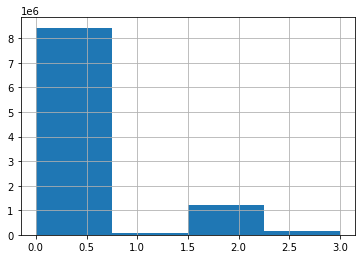

In [9]:
print(f"Number of Valid Values: {len(data['Invalid'][data['Invalid'] == 0])} ({(len(data['Invalid'][data['Invalid'] == 0])/len(data))*100}%)")
print(f"Number of Invalid Values: {len(data['Invalid'][data['Invalid'] != 0])} ({(len(data['Invalid'][data['Invalid'] != 0])/len(data))*100}%)")
print(f"Number of Invalid = 1: {len(data['Invalid'][data['Invalid'] == 1])} ({(len(data['Invalid'][data['Invalid'] == 1])/len(data))*100}%)")
print(f"Number of Invalid = 2: {len(data['Invalid'][data['Invalid'] == 2])} ({(len(data['Invalid'][data['Invalid'] == 2])/len(data))*100}%)")
print(f"Number of Invalid = 3: {len(data['Invalid'][data['Invalid'] == 3])} ({(len(data['Invalid'][data['Invalid'] == 3])/len(data))*100}%)")

print(f"Number Unique of Invalid Values: {len(data['Invalid'].unique())}")
hist = data['Invalid'].hist(bins=len(data['Invalid'].unique()))

Zoom on the Invalid values

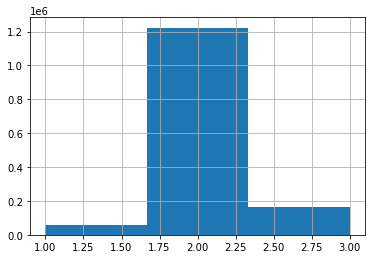

In [10]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [11]:
#data['Invalid'][(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0)] = 4
data_invalid2_special = data.loc[(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0), 'Invalid']
#  data.loc[(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0), 'Invalid'] = 0
print(f"Number of Invalid = 2 (Special case): {len(data_invalid2_special)} ({(len(data_invalid2_special)/len(data))*100}%)")

Number of Invalid = 2 (Special case): 1165472 (11.807679035765108%)


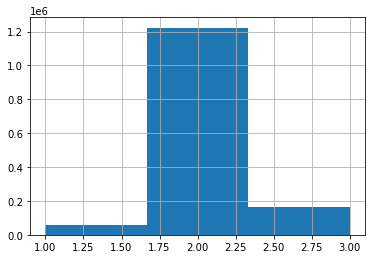

In [12]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [13]:
print(f"Number of Correct Values: {len(data['Failure'][data['Failure'] == 0])} ({(len(data['Failure'][data['Failure'] == 0])/len(data))*100}%)")
print(f"Number of Failure Values: {len(data['Failure'][data['Failure'] != 0])} ({(len(data['Failure'][data['Failure'] != 0])/len(data))*100}%)")

print(f"Number Unique of Failure Values: {len(data['Failure'].unique())}")

Number of Correct Values: 9766428 (98.94604688049937%)
Number of Failure Values: 104030 (1.053953119500635%)
Number Unique of Failure Values: 277


Se realiza un mapeo de los ID de los detectores a una serie de números del "0" a "N - 1" (N= cantidad de detectores = 57). Dicha serie está ordenada según la ubicación de los detectores en la autopista, siendo "0" el detector que se encuentra más al Sur y "N-1" el que se encuentra más al Norte.

The detector IDs are mapped to a series of numbers from "0" to "N - 1" (N= number of detectors = 57). This series is ordered according to the location of the detectors on the highway, with "0" being the southernmost detector and "N-1" being the northernmost.

In [14]:
detectors_nb_list = ['440.1.335',
                     '439.1.334',
  '439.2.333',
  '439.3.332',
  '438.1.331',
  '438.2.330',
  '438.3.329',
  '359.1.325',
  '358.1.325',
  '358.2.320',
  '358.3.319',
  '357.1.312',
  '357.2.311',
  '357.3.310',
  '356.1.309',
  '356.2.308',
  '355.1.156',
  '355.2.153',
  '355.3.155',
  '354.1.79',
  '354.2.144',
  '354.3.145',
  '32.1.142',
  '34.1.94',
  '39.2.88',
  '48.2.83',
  '49.1.82',
  '49.2.12',
  '49.3.15',
  '58.2.17',
  '59.1.18',
  '59.2.18',
  '70.2.21',
  '71.2.23',
  '72.1.22',
  '72.2.28',
  '89.1.28',
  '89.2.30',
  '97.1.33',
  '97.2.33',
  '97.3.38',
  '99.1.35',
  '110.1.41',
  '112.2.44',
  '113.2.45',
  '122.2.48',
  '124.2.49',
  '137.1.80',
  '138.1.53',
  '138.2.55',
  '146.2.238',
  '148.2.58',
  '149.2.240',
  '160.2.242',
  '396.1.243',
  '396.2.246',
  '396.3.246',
  '397.1.247',
  '397.2.248',
  '398.1.249',
  '398.2.251']
print(len(detectors_nb_list))
detector_id_map = {}
data_unique_detect_ID = data['DetectorID'].unique()

count_loss = 0
for i in range(len(detectors_nb_list)):
    if detectors_nb_list[i] in data_unique_detect_ID:
        detector_id_map[detectors_nb_list[i]] = i - count_loss
    else:
        count_loss += 1
print(f'Detectors lost = {count_loss}')

data_detect_ID = data['DetectorID']

data_detect_new_ID = pd.Series([detector_id_map[i] for i in data_detect_ID])
print(data_detect_new_ID)
data['DetectID'] = data_detect_new_ID

61
Detectors lost = 0
0          54
1          54
2          54
3          54
4          54
           ..
9870453     1
9870454     1
9870455     3
9870456     3
9870457     3
Length: 9870458, dtype: int64


Se trasforma la columna 'DateTimeStamp' de string a un formato pd.datetime64 para poder ordenar los datos de forma cronológica y para poder analizar los períodos de muestreo.

The column 'DateTimeStamp' is transformed from string to a pd.datetime64 format to be able to sort the data chronologically and to be able to analyze the sampling periods.

In [15]:
data['DateTimeStamp'] = pd.to_datetime(data['DateTimeStamp'])
data = data.sort_values(by=['DateTimeStamp','DetectID'],ascending=[True, True])

date_time_obj = data['DateTimeStamp'].iloc[0]
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Minute:', date_time_obj.time().minute)
print('Date-time:', date_time_obj)

print(data['DateTimeStamp'].unique())
print(len(data['DateTimeStamp'].unique()))

Date: 2018-01-01
Time: 00:12:14
Minute: 12
Date-time: 2018-01-01 00:12:14
['2018-01-01T00:12:14.000000000' '2018-01-01T00:27:23.000000000'
 '2018-01-01T00:42:32.000000000' ... '2019-12-31T22:57:48.000000000'
 '2019-12-31T23:37:46.000000000' '2019-12-31T23:53:19.000000000']
63092


Se realiza un análisis de los tiempos de muestreo.

In [16]:
data.head()

DateTimeStamp  Lane  Volume  Occupancy  Speed  Poll_Count  Failure  \
3116 2018-01-01 00:12:14     1      14          0     73          15        0   
3117 2018-01-01 00:12:14     2      35          1     68          15        0   
3118 2018-01-01 00:12:14     3      19          0     61          15        0   
234  2018-01-01 00:12:14     1      10          0     80          15        0   
235  2018-01-01 00:12:14     2      40          1     54          15        0   

      Invalid DetectorID  DetectID  
3116        0  439.1.334         1  
3117        0  439.1.334         1  
3118        0  439.1.334         1  
234         0  439.2.333         2  
235         0  439.2.333         2

An analysis of sampling times is performed.

In [17]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
date_rest = []
date_rare = []
date_no_15 = []
for i in range(len(date_unq)-1):
    if date_unq[i+1].time().hour == date_unq[i].time().hour:
        rest = date_unq[i+1].time().minute - date_unq[i].time().minute
    elif (date_unq[i+1].time().hour > date_unq[i].time().hour) or ((date_unq[i+1].time().hour == 0) and (date_unq[i].time().hour == 23)):
        rest = date_unq[i+1].time().minute + 60 - date_unq[i].time().minute
    else:
        rest = -1
        date_rare.append([date_unq[i+1], date_unq[i]])
        #print("algo raro")
    date_rest.append(rest)
    if rest != 15:
        date_no_15.append([rest, date_unq[i+1], date_unq[i]])

print(f'\nTotal DateTimes = {len(date_unq)} vs Total DateTimes in 2 years with a period of 15 min = {(60/15)*24*365*2} --> DateLoss = {100 - (100*(len(date_unq)/((60/15)*24*365*2)))}%')
print(f'Periods other than 15 min = {len(date_no_15)}\n')

# Datos Raros
print(f'Very high periods (2h a 2 días) = {len(date_rare)}')
print(date_rare)

num = list(np.unique(date_rest))
count = np.zeros(len(num))
for i in date_no_15:
    if i[0] in num:
        count[num.index(i[0])] += 1
count[num.index(15)] = len(date_unq) - len(date_no_15)

fusion = []
for i in range(len(num)):
    fusion.append([num[i], count[i]])
print('\nPeriods vs number of samples')
print(fusion)


Total DateTimes = 63092 vs Total DateTimes in 2 years with a period of 15 min = 70080.0 --> DateLoss = 9.971461187214615%
Periods other than 15 min = 38470

Very high periods (2h a 2 días) = 21
[[Timestamp('2018-03-12 04:27:03'), Timestamp('2018-03-11 19:21:52')], [Timestamp('2018-03-19 05:03:36'), Timestamp('2018-03-18 23:15:16')], [Timestamp('2018-05-06 00:40:02'), Timestamp('2018-05-05 20:40:13')], [Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')], [Timestamp('2018-06-20 09:19:04'), Timestamp('2018-06-19 23:35:54')], [Timestamp('2019-02-16 16:36:11'), Timestamp('2019-02-15 22:58:57')], [Timestamp('2019-03-05 00:20:12'), Timestamp('2019-03-04 22:45:06')], [Timestamp('2019-03-21 07:58:58'), Timestamp('2019-03-20 22:57:41')], [Timestamp('2019-04-04 05:48:12'), Timestamp('2019-04-03 22:57:59')], [Timestamp('2019-04-15 06:05:32'), Timestamp('2019-04-14 22:57:04')], [Timestamp('2019-05-03 08:45:10'), Timestamp('2019-05-02 22:57:14')], [Timestamp('2019-05-15 05:31:00'),

En primera instancia lo que se observa es que existen gaps o irregularidades en la frecuencia de muestreo de datos pues se tienen 63092 muestras en un plazo de 2 años, en vez de las 70080 que se deberían tener si se mantuviera un período de muestreo constante de 15min. De hecho más de la mitad de las muestras (38470) poseen un período de muestreo distinto a 15 minutos. De estas 38470 muestras, 24622 tienen un período de muestreo de 16 min, y 6627 lo tienen de 17 min, por lo que podemos decir que el 90% de las muestras se encuentra alrededor de los 15 min, con una desviación de +-2 min. El otro 10% varía muchisimo, llendo desde 1 minuto hasta casi 2 días en los caso más extremos.

Hay 21 casos con períodos de muestreo muy altos. La mayoría de estos se dan una vez al mes, siento el patro que más se repite: muestra ~22:30h y luego la siguiente muestra a las ~05:30h del día siguiente. Existe un sólo caso donde no hubo muestras por todo un día y parte del otro ([Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')] --> No hubo muestars el día 2018-05-09)

In the first instance we can observe that there are gaps or irregularities in the sampling periods, since there are 63.092 samples in a period of 2 years, instead of the 70.080 that should be had if a constant sampling period of 15 minutes were maintained. In fact, more than half of the samples (38.470) have a sampling period other than 15 minutes. Of these 38.470 samples, 24.622 have a sampling period of 16 min, and 6.627 have a sampling period of 17 min, so we can say that 90% of the samples are around 15 min, with a deviation of +-2 min. The other 10% varies a lot, ranging from 1 minute to almost 2 days in the most extreme cases.

There are 21 cases with very high sampling periods. The majority of these occur once a month, with the most repeated pattern being: a sample at ~22:30h and then the next sample at ~05:30h the following day. There is only one case where there were no samples for all day and part of the other ([Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')] --> No samples on 2018-05-09).

### Agrupamiento de la data
Se agrupa la data por DateTime y por DetectID. Esto se hace para que los valores de la variables para un detector sean el mean() de los valores de todas sus "Lanes".

### Data grouping
The data is grouped by DateTime and DetectID. This is done so that the values of the variables for a detector are the mean() of the values of all its "Lanes".

In [18]:
data = data.groupby(['DateTimeStamp','DetectID'], as_index=False).mean()

In [19]:
data.head(10)

DateTimeStamp  DetectID  Lane  Volume  Occupancy   Speed  Poll_Count  \
0 2018-01-01 00:12:14         1   2.0  22.667      0.333  67.333        15.0   
1 2018-01-01 00:12:14         2   2.0  18.000      0.333  62.667        15.0   
2 2018-01-01 00:12:14         4   2.0  25.667      0.000  81.000        15.0   
3 2018-01-01 00:12:14         5   2.0  21.333      0.000  78.333        15.0   
4 2018-01-01 00:12:14         6   2.0  22.000      0.000  79.333        15.0   
5 2018-01-01 00:12:14         7   3.0  12.000      0.000  61.000        14.0   
6 2018-01-01 00:12:14         8   2.0  32.000      0.333  67.667        14.0   
7 2018-01-01 00:12:14         9   2.0  36.333      0.000  71.667        15.0   
8 2018-01-01 00:12:14        10   2.0  36.000      0.000  71.333        15.0   
9 2018-01-01 00:12:14        11   2.0  31.333      0.000  64.667        15.0   

   Failure  Invalid  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  
5      0.0      0.0  
6      0.0      0.0  
7      0.0      0.0  
8      0.0      0.0  
9      0.0      0.0

In [19]:
print(data['DetectID'].unique())

[ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 31 32 33 35 36 37 38 39 40 41 42 43 44 45 47 50 52 53 54 55
 56 57 58 59 60 30  0 48  3 49 46 34 51]


In [20]:
data.describe()

DetectID       Lane     Volume  Occupancy      Speed  Poll_Count  \
count  2.753e+06  2.753e+06  2.753e+06  2.753e+06  2.753e+06   2.753e+06   
mean   2.895e+01  2.375e+00  1.561e+02  4.576e+00  5.340e+01   1.577e+01   
std    1.699e+01  5.449e-01  1.615e+02  6.265e+00  2.224e+01   2.568e+00   
min    0.000e+00  1.000e+00 -1.151e+04  0.000e+00  0.000e+00   1.000e+00   
25%    1.500e+01  2.000e+00  5.133e+01  1.000e+00  4.900e+01   1.500e+01   
50%    2.800e+01  2.000e+00  1.297e+02  2.833e+00  6.225e+01   1.500e+01   
75%    4.100e+01  2.500e+00  2.282e+02  5.800e+00  6.800e+01   1.600e+01   
max    6.000e+01  6.000e+00  3.903e+03  1.130e+02  9.167e+01   4.500e+01   

         Failure    Invalid  
count  2.753e+06  2.753e+06  
mean   4.065e-01  2.882e-01  
std    7.136e+00  7.061e-01  
min    0.000e+00  0.000e+00  
25%    0.000e+00  0.000e+00  
50%    0.000e+00  0.000e+00  
75%    0.000e+00  0.000e+00  
max    4.480e+02  3.000e+00

In [21]:
data.describe(include=['datetime64[ns]', 'object'])

DateTimeStamp
count               2752872
unique                63092
top     2018-01-13 10:36:10
freq                     56
first   2018-01-01 00:12:14
last    2019-12-31 23:53:19

In [22]:
print(data.info())
print(f'Shape of the data = {data.shape}')
#print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752872 entries, 0 to 2752871
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   DateTimeStamp  datetime64[ns]
 1   DetectID       int64         
 2   Lane           float64       
 3   Volume         float64       
 4   Occupancy      float64       
 5   Speed          float64       
 6   Poll_Count     float64       
 7   Failure        float64       
 8   Invalid        float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 210.0 MB
None
Shape of the data = (2752872, 9)


In [23]:
print('NA Count:')
print(data.isna().sum())

NA Count:
DateTimeStamp    0
DetectID         0
Lane             0
Volume           0
Occupancy        0
Speed            0
Poll_Count       0
Failure          0
Invalid          0
dtype: int64


Number of Valid Values: 2292964 (83.29352036709298%)
Number of Invalid Values: 459908 (16.706479632907016%)
Number of Invalid = 1: 11643 (0.4229401149054515%)
Number of Invalid = 2: 265033 (9.627509016038523%)
Number of Invalid = 3: 43856 (1.5930998607999207%)
Number Unique of Invalid Values: 41


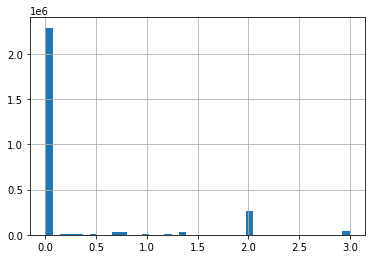

In [24]:
print(f"Number of Valid Values: {len(data['Invalid'][data['Invalid'] == 0])} ({(len(data['Invalid'][data['Invalid'] == 0])/len(data))*100}%)")
print(f"Number of Invalid Values: {len(data['Invalid'][data['Invalid'] != 0])} ({(len(data['Invalid'][data['Invalid'] != 0])/len(data))*100}%)")
print(f"Number of Invalid = 1: {len(data['Invalid'][data['Invalid'] == 1])} ({(len(data['Invalid'][data['Invalid'] == 1])/len(data))*100}%)")
print(f"Number of Invalid = 2: {len(data['Invalid'][data['Invalid'] == 2])} ({(len(data['Invalid'][data['Invalid'] == 2])/len(data))*100}%)")
print(f"Number of Invalid = 3: {len(data['Invalid'][data['Invalid'] == 3])} ({(len(data['Invalid'][data['Invalid'] == 3])/len(data))*100}%)")

print(f"Number Unique of Invalid Values: {len(data['Invalid'].unique())}")
hist = data['Invalid'].hist(bins=len(data['Invalid'].unique()))

In [25]:
print(len(data['DetectID'].unique()))
data['DetectID'].unique()

61


array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 47, 50, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 30,  0, 48,  3, 49, 46, 34, 51], dtype=int64)

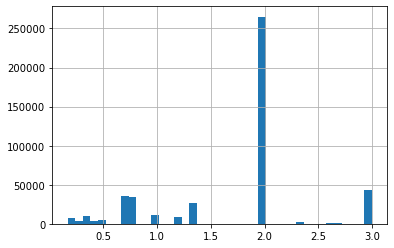

In [26]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [27]:
data = data[data['Invalid'] == 0]
print(data.shape)

(2292964, 9)


In [28]:
print(f"Number of Correct Values: {len(data['Failure'][data['Failure'] == 0])} ({(len(data['Failure'][data['Failure'] == 0])/len(data))*100}%)")
print(f"Number of Failure Values: {len(data['Failure'][data['Failure'] != 0])} ({(len(data['Failure'][data['Failure'] != 0])/len(data))*100}%)")

print(f"Number Unique of Failure Values: {len(data['Failure'].unique())}")

Number of Correct Values: 2261524 (98.62884894834808%)
Number of Failure Values: 31440 (1.371151051651923%)
Number Unique of Failure Values: 57


In [29]:
data = data[data['Failure'] == 0]
print(data.shape)

(2261524, 9)


El siguiente es un histograma que representa el número de muestra que se tienen de cada detector. (Recordar que el número total de muestras de DateTime = 63092)

The following is a histogram representing the number of samples you have from each detector. (Recall that the total number of samples of DateTime = 63092)

In [30]:
print(len(data['DetectID'].unique()))
data['DetectID'].unique()

56


array([ 1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 21, 24, 25, 27, 28,
       29, 31, 33, 35, 36, 37, 38, 39, 40, 41, 43, 44, 47, 50, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 32, 42, 30, 13, 46, 34, 17, 18,  3, 45, 51,
       19, 20, 16, 23, 12], dtype=int64)

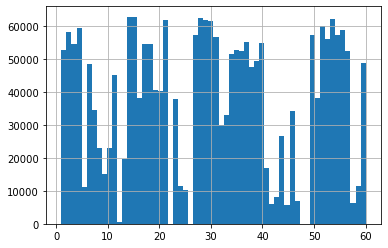

In [31]:
hist = data['DetectID'].hist(bins=data['DetectID'].max())

En la siguientes celdas se ven los números representados en el histograma en forma "total" y en forma de porcentaje con respecto al número total de muestras de DateTime.

In the next cells you see the numbers represented in the histogram in "total" form and as a "percentage" of the total number of DateTime samples.

In [32]:
print('Samples by detector "Totals"')
data.groupby('DetectID')['DateTimeStamp'].count()

Samples by detector "Totals"


DetectID
1     52643
2     58285
3     54717
4     59455
5     11208
6     48418
7     34469
8     23146
9     15050
10    22982
11    45090
12      490
13    19666
14    62903
15    62877
16    38295
17    54514
18    54569
19    40618
20    40417
21    61917
23    37908
24    11444
25    10218
27    57439
28    62416
29    61954
30    61485
31    56734
32    29951
33    33158
34    51685
35    52772
36    52564
37    55195
38    47481
39    49335
40    54866
41    16894
42     5909
43     8024
44    26529
45     5572
46    34227
47     6862
50    57203
51    38295
52    59940
53    56137
54    62087
55    57300
56    58998
57    52363
58     6375
59    11614
60    48861
Name: DateTimeStamp, dtype: int64

Samples by detector "Percentage"
DetectID
1     83.438
2     92.381
3     86.726
4     94.235
5     17.765
6     76.742
7     54.633
8     36.686
9     23.854
10    36.426
11    71.467
12     0.777
13    31.170
14    99.700
15    99.659
16    60.697
17    86.404
18    86.491
19    64.379
20    64.060
21    98.138
23    60.084
24    18.139
25    16.195
27    91.040
28    98.929
29    98.196
30    97.453
31    89.923
32    47.472
33    52.555
34    81.920
35    83.643
36    83.313
37    87.483
38    75.257
39    78.195
40    86.962
41    26.777
42     9.366
43    12.718
44    42.048
45     8.832
46    54.249
47    10.876
50    90.666
51    60.697
52    95.004
53    88.976
54    98.407
55    90.820
56    93.511
57    82.995
58    10.104
59    18.408
60    77.444
Name: DateTimeStamp, dtype: float64
Theshod = 54
Valid detectors = 38
Int64Index([ 1,  2,  3,  4,  6,  7, 11, 14, 15, 16, 17, 18, 19, 20, 21, 23, 27,
            28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 46, 50, 51, 52, 53, 54,


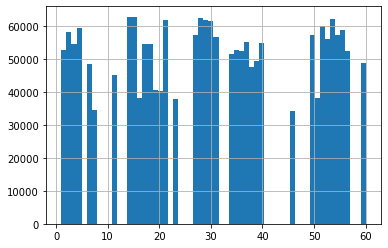

In [33]:
print('Samples by detector "Percentage"')
detect_count_per = data.groupby('DetectID')['DateTimeStamp'].count()*100/63092
print(detect_count_per)

theshod = 54
print(f'Theshod = {theshod}')
valid_detect = detect_count_per[detect_count_per > theshod].index
print(f'Valid detectors = {len(valid_detect)}')
print(valid_detect)
hist = data['DetectID'][data['DetectID'].isin(valid_detect)].hist(bins=data['DetectID'].max())

In [34]:
last_detect = 40
data = data[(data['DetectID'].isin(valid_detect)) & (data['DetectID'] <= last_detect)]
print(data.shape)
print(data['DetectID'].unique())
print(f"Number of detectors = {len(data['DetectID'].unique())}")

(1471021, 9)
[ 1  2  4  6  7 11 14 15 21 27 28 29 31 35 36 37 38 39 40 30 34 17 18  3
 19 20 16 23]
Number of detectors = 28


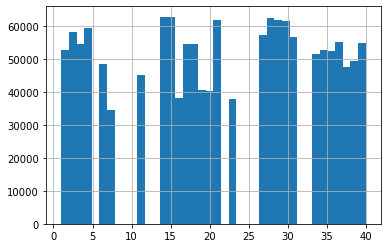

In [35]:
hist = data['DetectID'].hist(bins=data['DetectID'].max())

In [36]:
data.head(10)

DateTimeStamp  DetectID  Lane  Volume  Occupancy   Speed  Poll_Count  \
0  2018-01-01 00:12:14         1   2.0  22.667      0.333  67.333        15.0   
1  2018-01-01 00:12:14         2   2.0  18.000      0.333  62.667        15.0   
2  2018-01-01 00:12:14         4   2.0  25.667      0.000  81.000        15.0   
4  2018-01-01 00:12:14         6   2.0  22.000      0.000  79.333        15.0   
5  2018-01-01 00:12:14         7   3.0  12.000      0.000  61.000        14.0   
9  2018-01-01 00:12:14        11   2.0  31.333      0.000  64.667        15.0   
12 2018-01-01 00:12:14        14   2.0  36.000      0.000  74.000        15.0   
13 2018-01-01 00:12:14        15   2.0  50.000      0.667  71.333        15.0   
19 2018-01-01 00:12:14        21   2.0  38.667      0.000  76.667        14.0   
25 2018-01-01 00:12:14        27   2.0  70.000     50.000  59.500        15.0   

    Failure  Invalid  
0       0.0      0.0  
1       0.0      0.0  
2       0.0      0.0  
4       0.0      0.0  
5       0.0      0.0  
9       0.0      0.0  
12      0.0      0.0  
13      0.0      0.0  
19      0.0      0.0  
25      0.0      0.0

In [37]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
date_rest = []
date_rare = []
date_no_15 = []
for i in range(len(date_unq)-1):
    if date_unq[i+1].time().hour == date_unq[i].time().hour:
        rest = date_unq[i+1].time().minute - date_unq[i].time().minute
    elif (date_unq[i+1].time().hour > date_unq[i].time().hour) or ((date_unq[i+1].time().hour == 0) and (date_unq[i].time().hour == 23)):
        rest = date_unq[i+1].time().minute + 60 - date_unq[i].time().minute
    else:
        rest = -1
        date_rare.append([date_unq[i+1], date_unq[i]])
        #print("algo raro")
    date_rest.append(rest)
    if rest != 15:
        date_no_15.append([rest, date_unq[i+1], date_unq[i]])

print(f'\nTotal DateTimes = {len(date_unq)} vs Total DateTimes in 2 years with a period of 15 min = {(60/15)*24*365*2} --> DateLoss = {100 - (100*(len(date_unq)/((60/15)*24*365*2)))}')
print(f'Periods other than 15 min = {len(date_no_15)}\n')

# Datos Raros
print(f'Very high periods (2h a 2 días) = {len(date_rare)}')
print(date_rare)

num = list(np.unique(date_rest))
count = np.zeros(len(num))
for i in date_no_15:
    if i[0] in num:
        count[num.index(i[0])] += 1
count[num.index(15)] = len(date_unq) - len(date_no_15)

fusion = []
for i in range(len(num)):
    fusion.append([num[i], count[i]])
print('\nPeriods vs number of samples')
print(fusion)


Total DateTimes = 63046 vs Total DateTimes in 2 years with a period of 15 min = 70080.0 --> DateLoss = 10.037100456621005
Periods other than 15 min = 38464

Very high periods (2h a 2 días) = 21
[[Timestamp('2018-03-12 05:34:14'), Timestamp('2018-03-11 12:02:32')], [Timestamp('2018-03-19 05:03:36'), Timestamp('2018-03-18 23:00:07')], [Timestamp('2018-05-06 00:40:02'), Timestamp('2018-05-05 20:40:13')], [Timestamp('2018-05-10 07:46:46'), Timestamp('2018-05-08 22:17:57')], [Timestamp('2018-06-20 09:19:04'), Timestamp('2018-06-19 23:35:54')], [Timestamp('2019-02-16 16:36:11'), Timestamp('2019-02-15 22:58:57')], [Timestamp('2019-03-05 00:20:12'), Timestamp('2019-03-04 22:45:06')], [Timestamp('2019-03-21 07:58:58'), Timestamp('2019-03-20 22:57:41')], [Timestamp('2019-04-04 05:48:12'), Timestamp('2019-04-03 22:57:59')], [Timestamp('2019-04-15 06:05:32'), Timestamp('2019-04-14 22:57:04')], [Timestamp('2019-05-03 08:45:10'), Timestamp('2019-05-02 22:57:14')], [Timestamp('2019-05-15 05:31:00'),

<ipython-input-38-f9a8e3c42faf>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


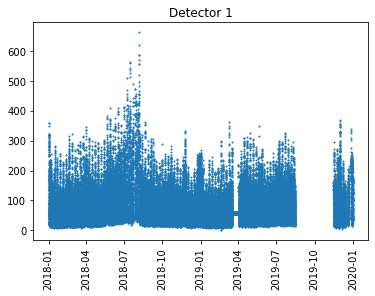

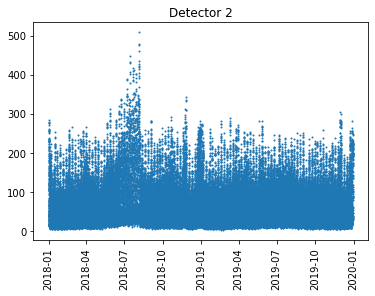

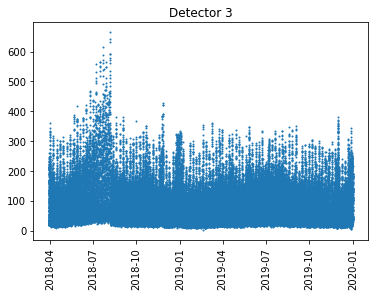

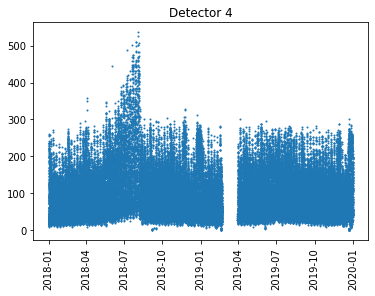

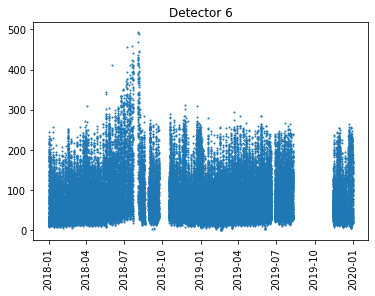

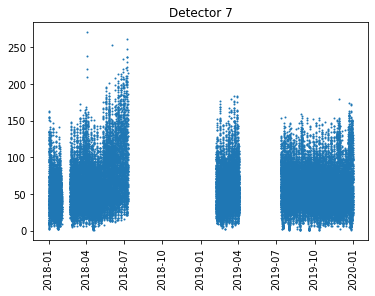

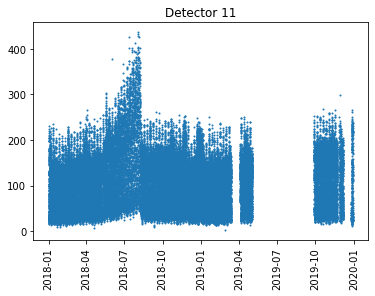

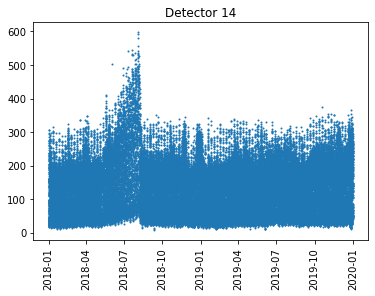

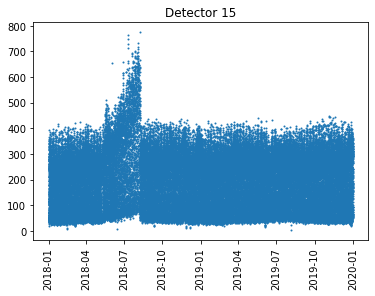

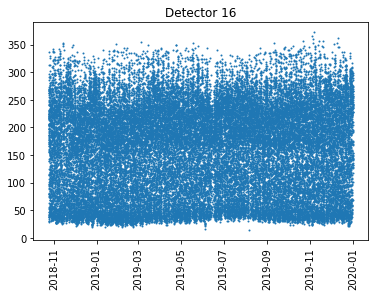

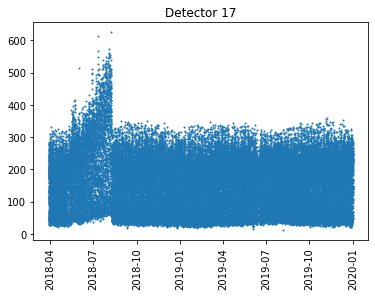

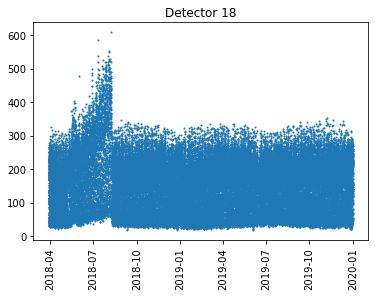

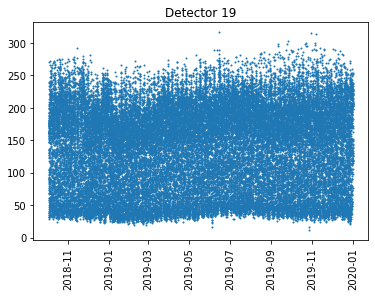

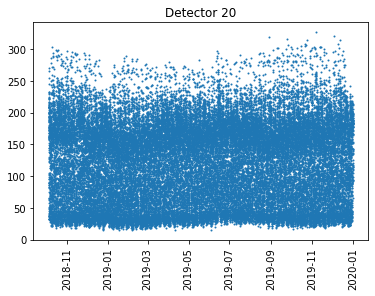

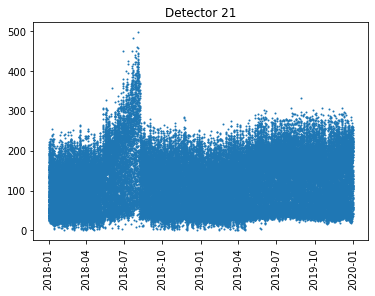

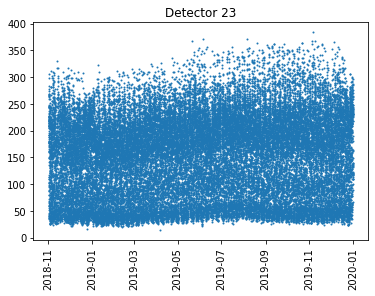

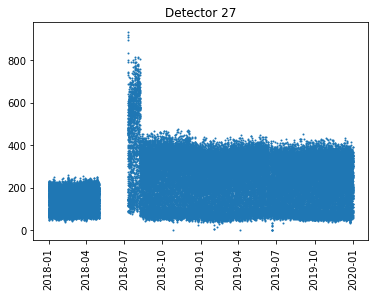

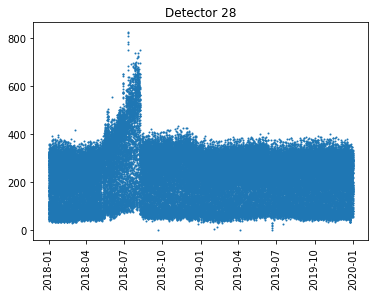

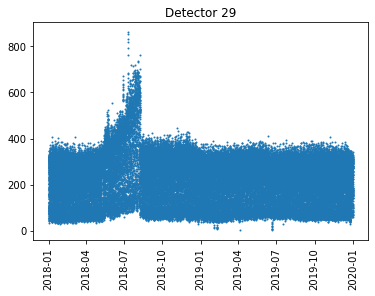

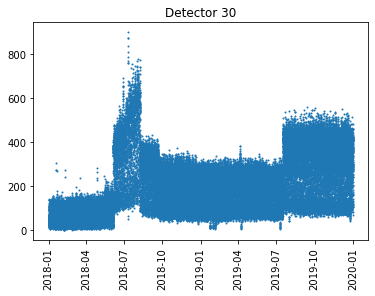

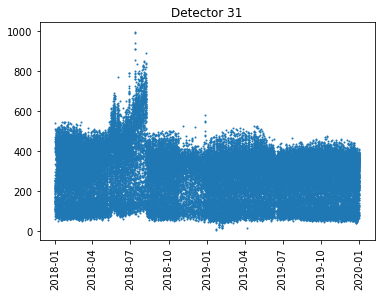

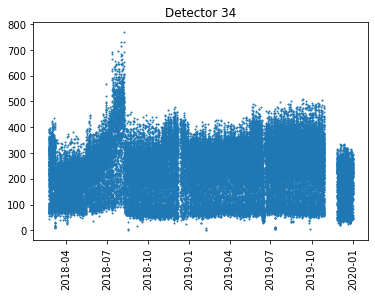

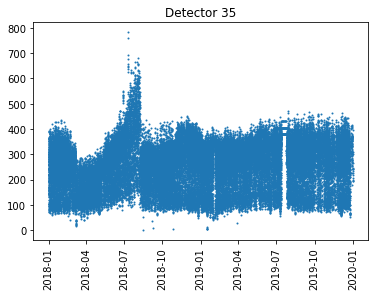

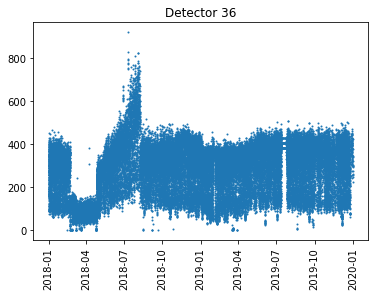

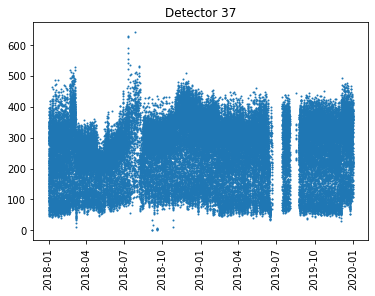

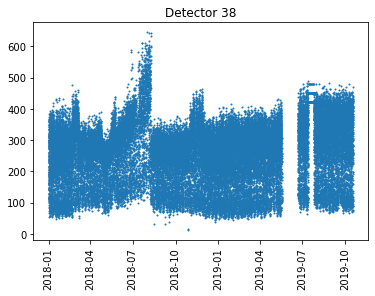

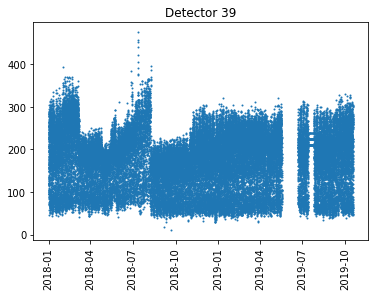

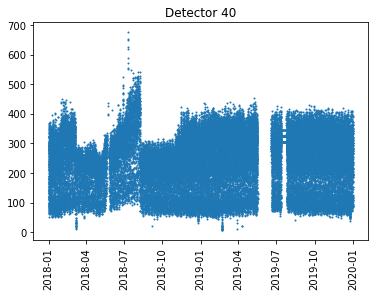

In [38]:
for detector in np.sort(data['DetectID'].unique()):
#detector = 5
    df = data[data['DetectID'] == detector][['DateTimeStamp', 'Volume']]
    #date_mask = df['DateTimeStamp'].map(lambda x: x.year == 2018 and x.month == 1)# and x.day == 20 and x.hour > 17)
    #df = df[date_mask]
    plt.figure()
    plt.title(f'Detector {detector}')
    plt.scatter(df['DateTimeStamp'], df['Volume'], s=1)
    plt.xticks(rotation='vertical')

<ipython-input-39-352206af1d47>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


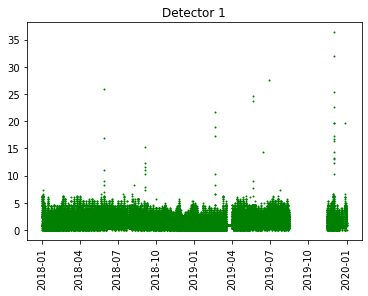

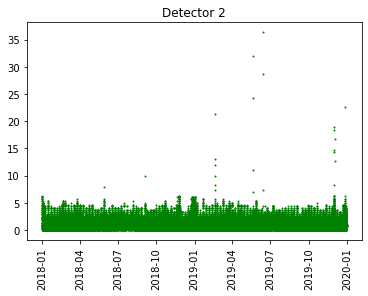

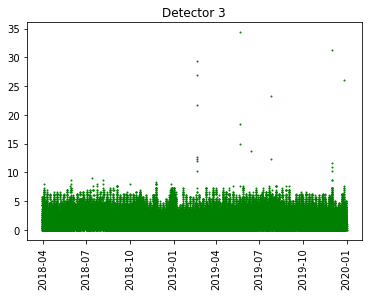

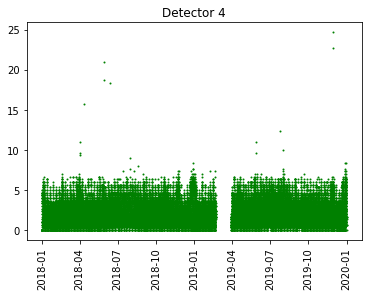

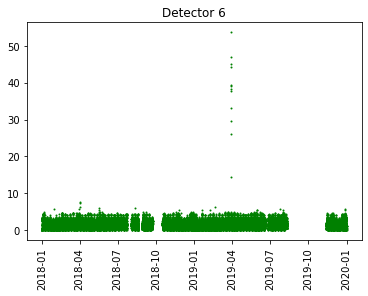

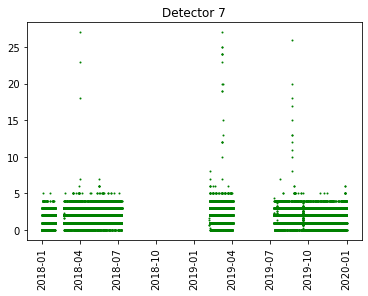

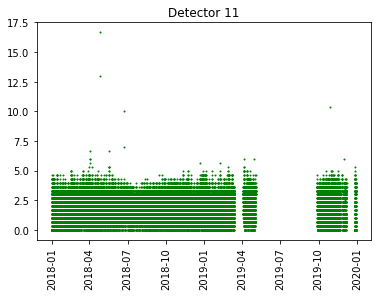

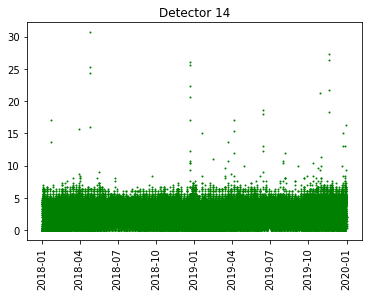

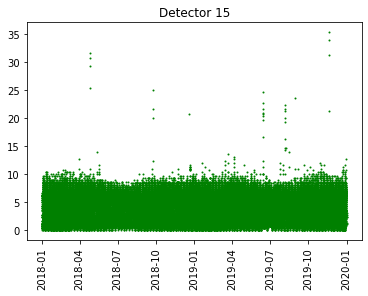

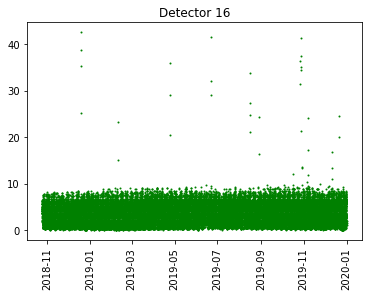

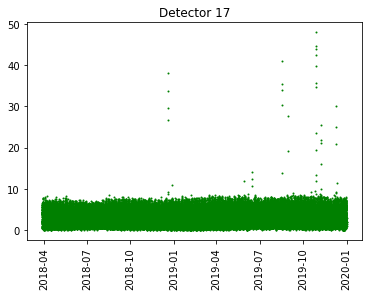

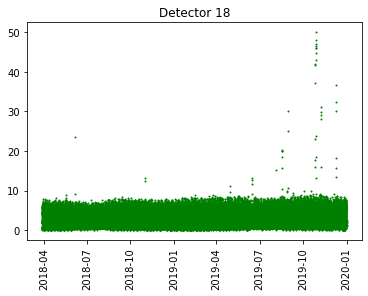

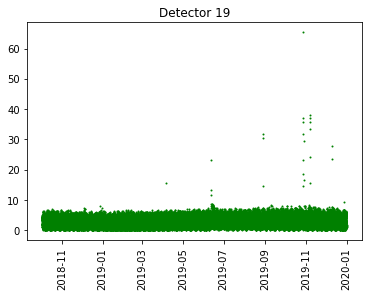

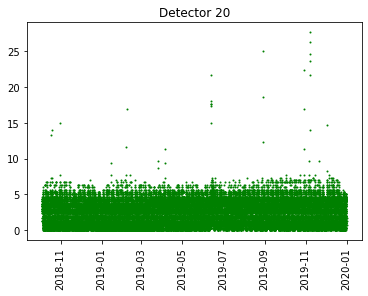

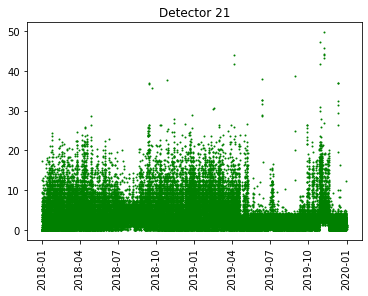

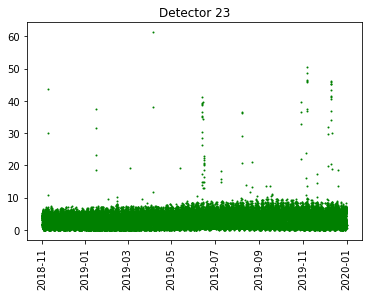

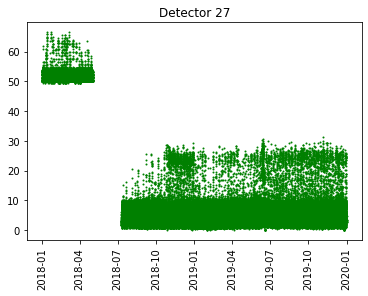

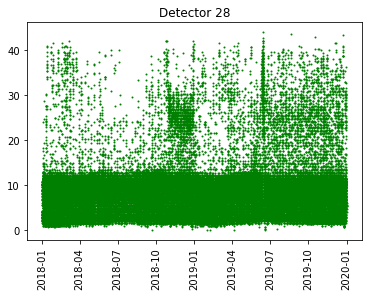

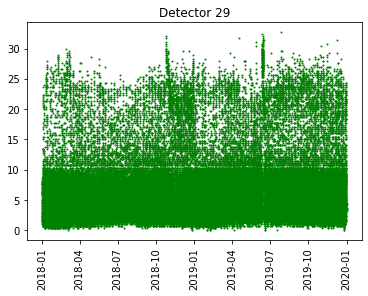

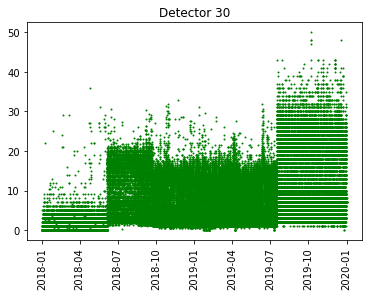

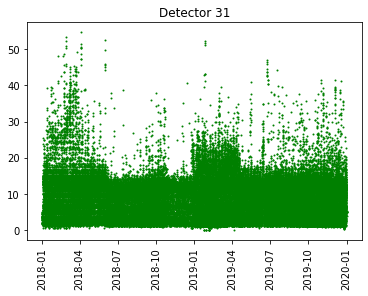

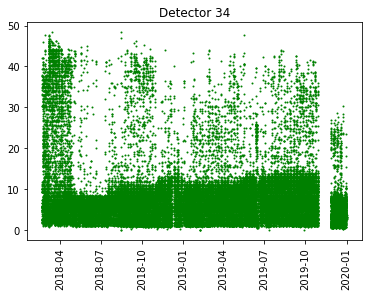

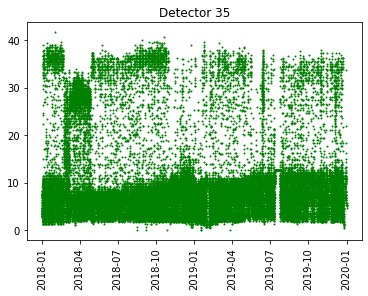

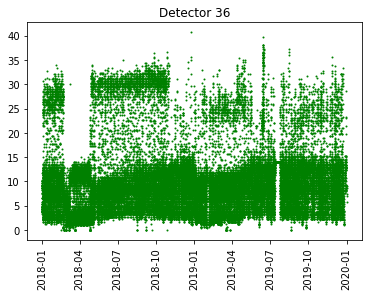

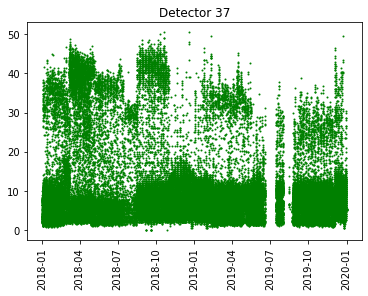

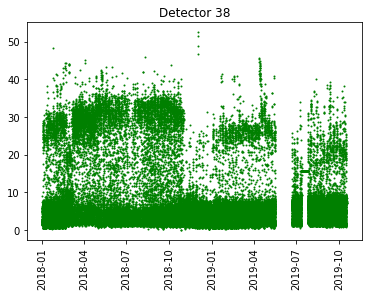

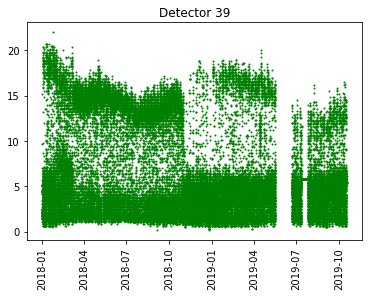

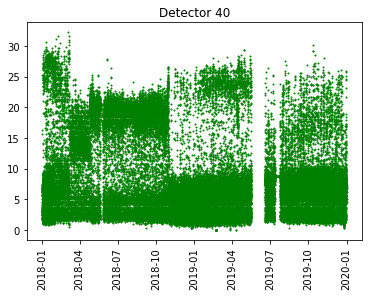

In [39]:
for detector in np.sort(data['DetectID'].unique()):
#detector = 5
    df = data[data['DetectID'] == detector][['DateTimeStamp', 'Occupancy']]
    #date_mask = df['DateTimeStamp'].map(lambda x: x.year == 2018 and x.month == 1)# and x.day == 20 and x.hour > 17)
    #df = df[date_mask]
    plt.figure()
    plt.title(f'Detector {detector}')
    plt.scatter(df['DateTimeStamp'], df['Occupancy'],s=1,c='g')
    plt.xticks(rotation='vertical')

<ipython-input-40-811f99859049>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


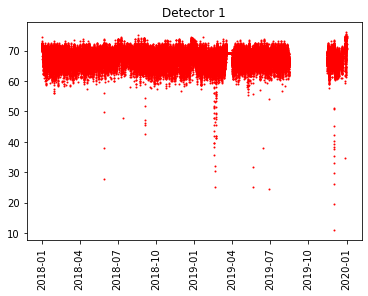

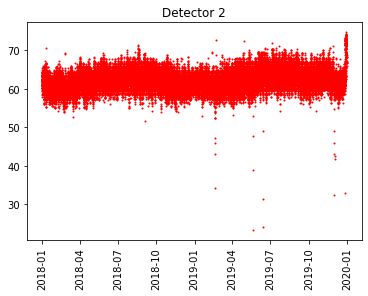

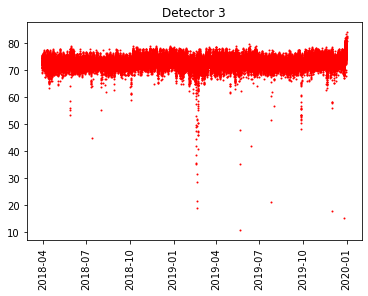

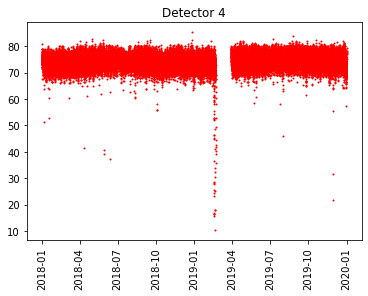

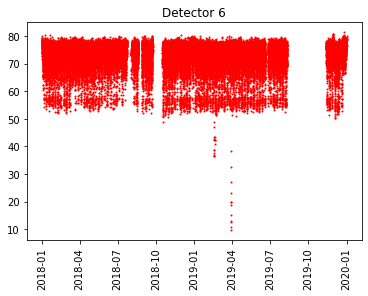

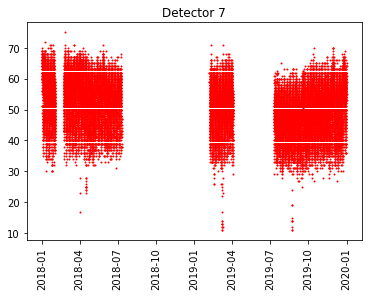

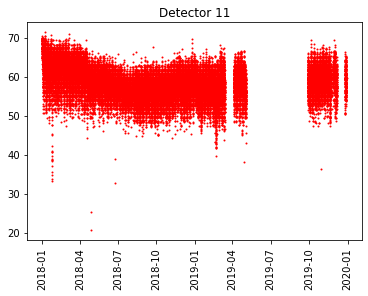

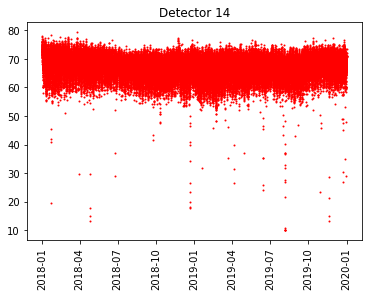

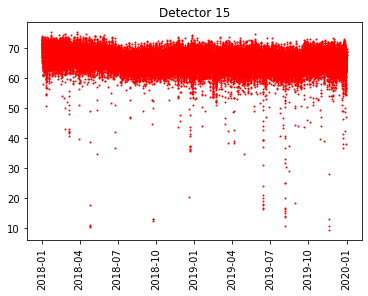

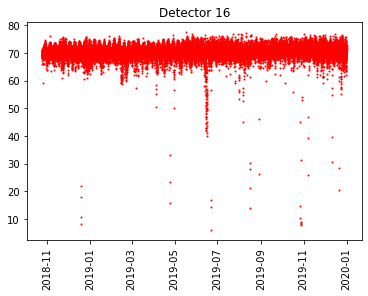

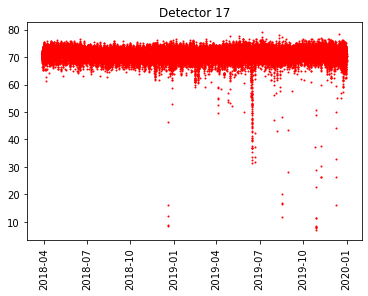

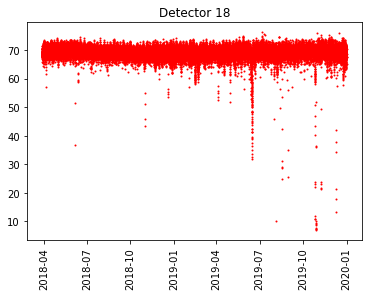

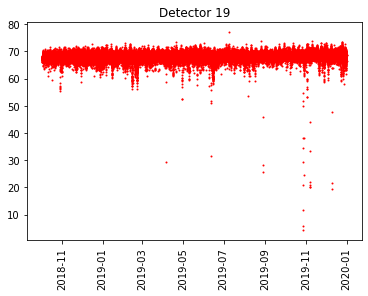

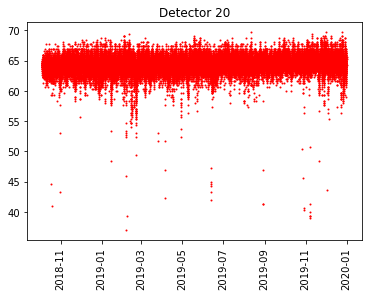

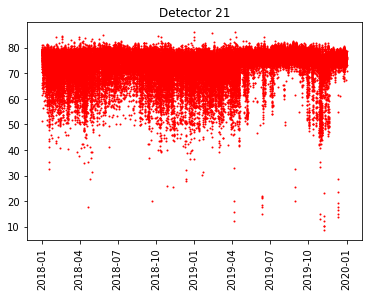

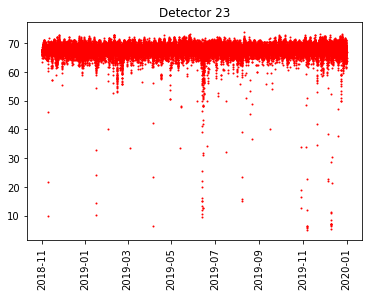

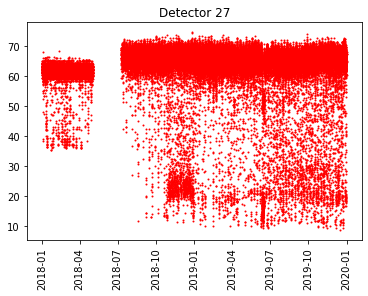

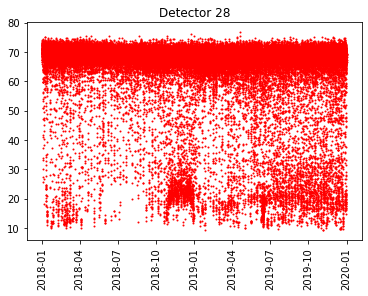

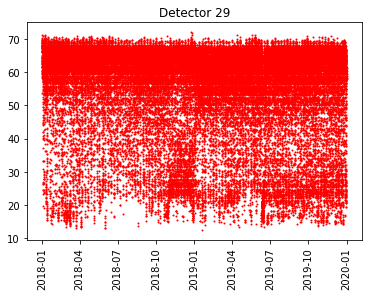

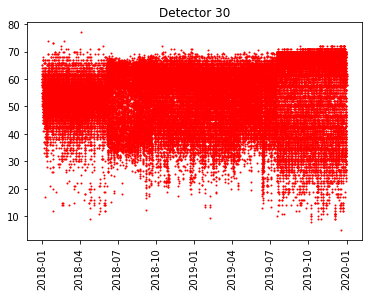

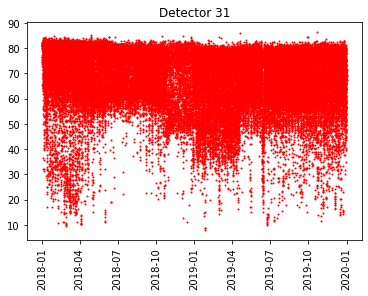

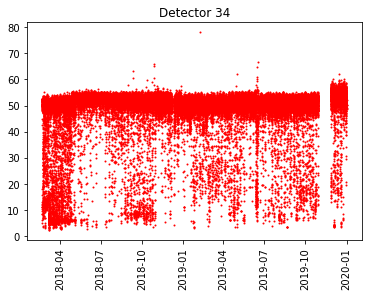

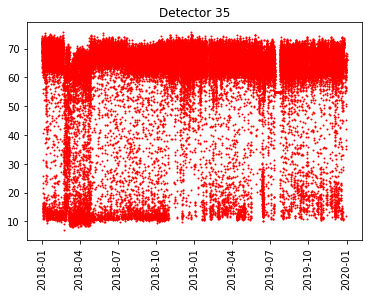

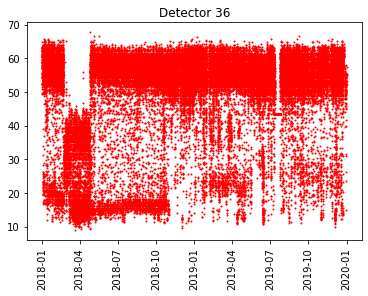

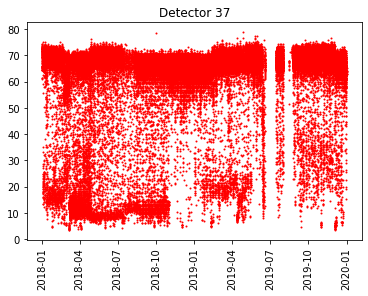

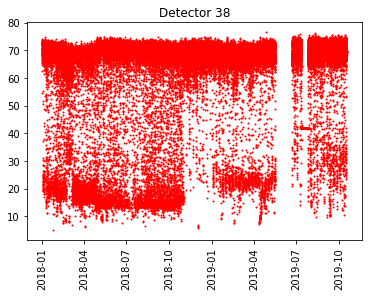

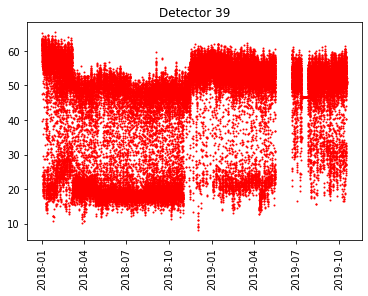

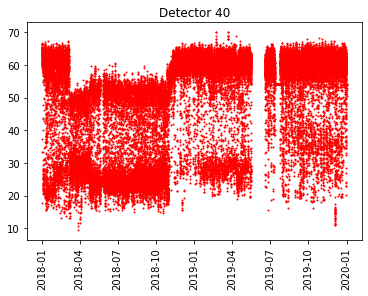

In [40]:
for detector in np.sort(data['DetectID'].unique()):
#detector = 5
    df = data[data['DetectID'] == detector][['DateTimeStamp', 'Speed']]
    #date_mask = df['DateTimeStamp'].map(lambda x: x.year == 2018 and x.month == 1)# and x.day == 20 and x.hour > 17)
    #df = df[date_mask]
    plt.figure()
    plt.title(f'Detector {detector}')
    plt.scatter(df['DateTimeStamp'], df['Speed'],s=1,c='r')
    plt.xticks(rotation='vertical')

<ipython-input-41-efd8cc810077>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


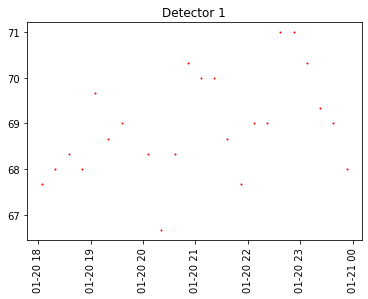

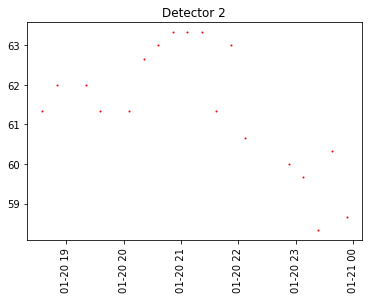

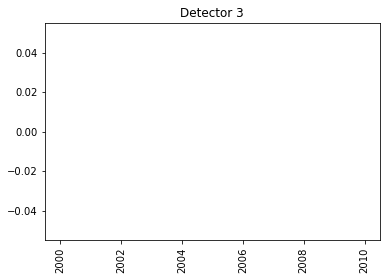

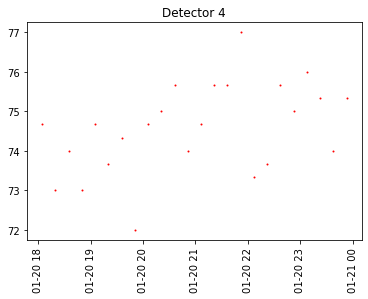

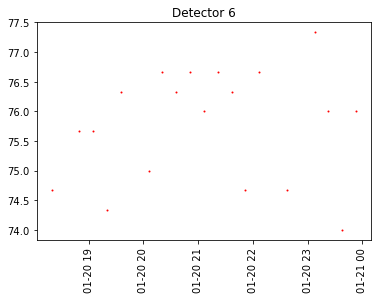

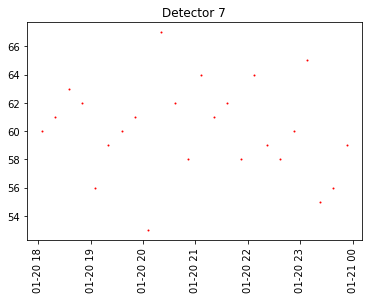

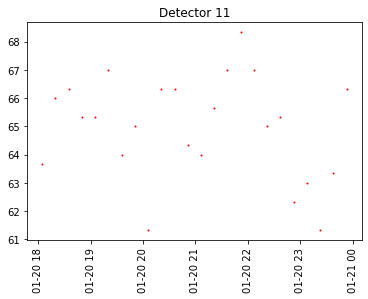

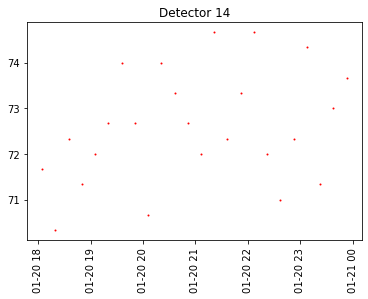

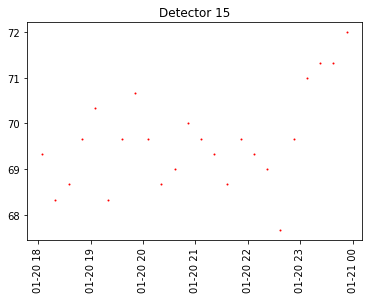

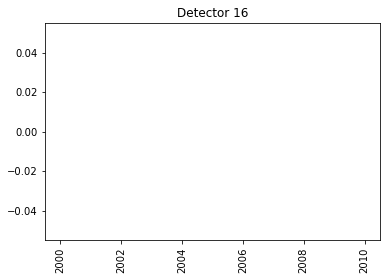

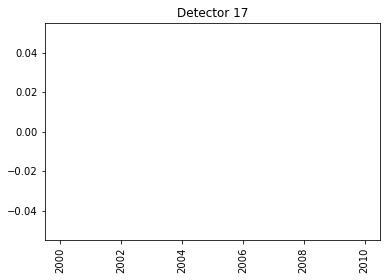

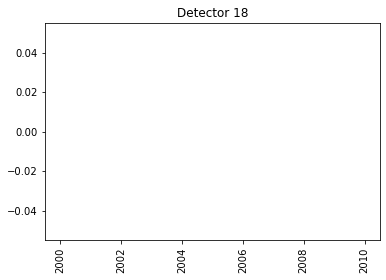

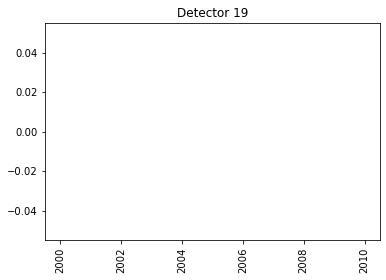

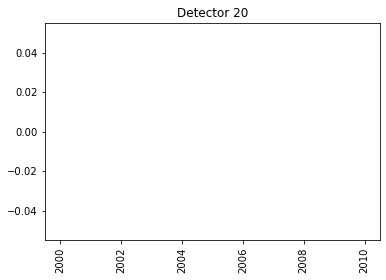

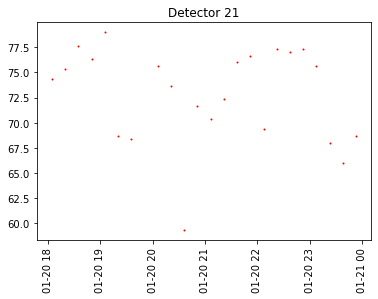

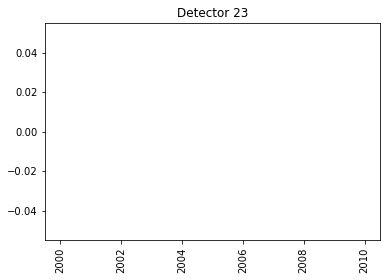

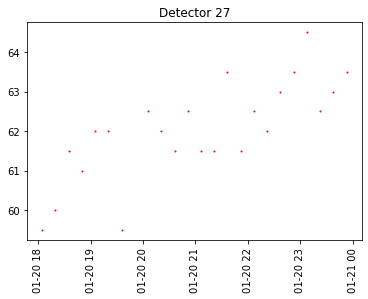

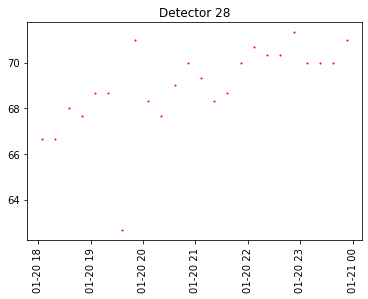

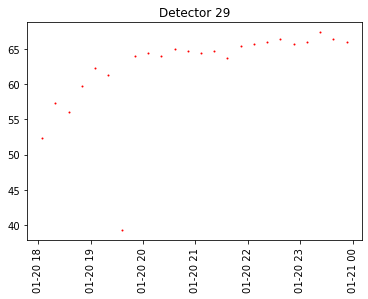

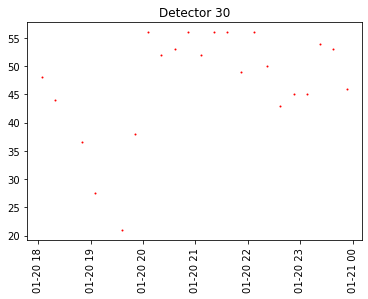

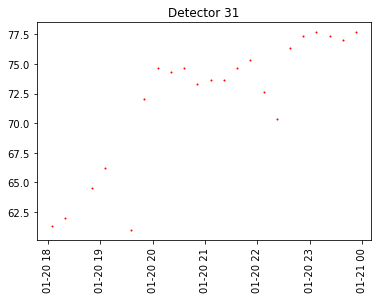

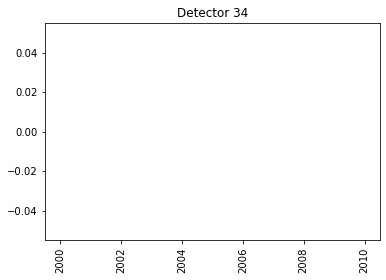

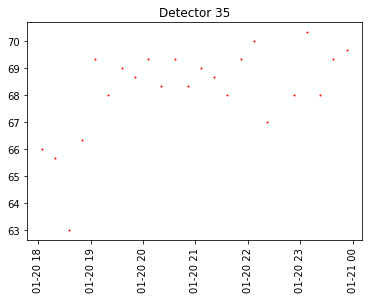

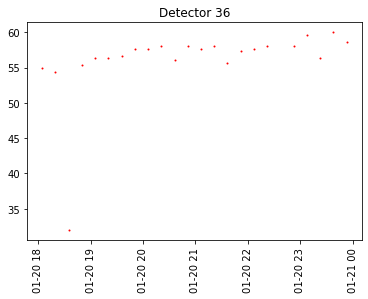

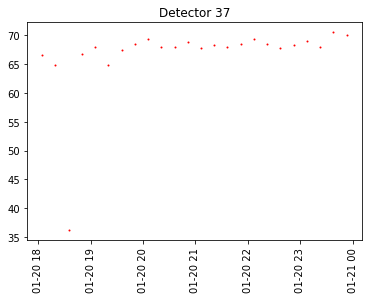

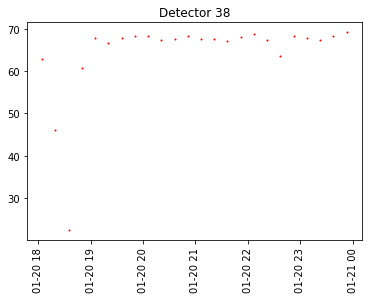

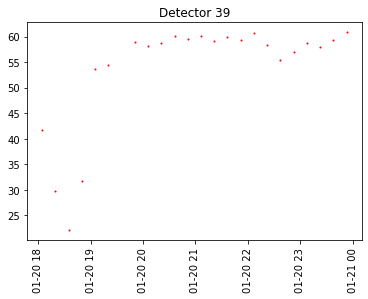

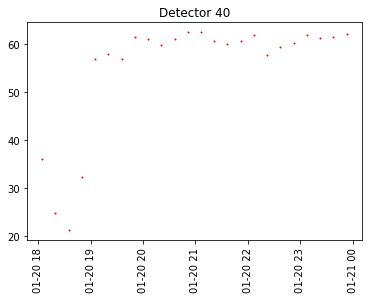

In [41]:
for detector in np.sort(data['DetectID'].unique()):
#detector = 5
    df = data[data['DetectID'] == detector][['DateTimeStamp', 'Speed']]
    date_mask = df['DateTimeStamp'].map(lambda x: x.year == 2018 and x.month == 1 and x.day == 20 and x.hour > 17)
    df = df[date_mask]
    plt.figure()
    plt.title(f'Detector {detector}')
    plt.scatter(df['DateTimeStamp'], df['Speed'],s=1,c='r')
    plt.xticks(rotation='vertical')

[34437. 34697. 34868. 35060. 34583. 33961. 33328. 33043. 32639. 32306.
 32197. 32397. 33027. 33715. 34110.]
33624.53333333333


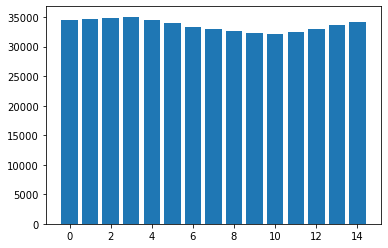

In [43]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
count = np.zeros(15)
error = 3
for num in range(15):
    for i in range(len(date_unq)):
        diff = abs((date_unq[i].time().minute - num) % 15)
        if diff > 7:
            diff = 15 - diff
        if diff > error:
            count[num] += 1
print(count)
plt.bar(range(15), count)
print(np.mean(count))

In [44]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
detect_unq = len(data['DetectID'].unique())
count_100 = 0
count_80 = 0
count_70 = 0
count_60 = 0
for date in date_unq:
    num_sensors = data[data['DateTimeStamp'] == date].shape[0]
    if num_sensors == int(detect_unq):
        count_100 += 1
    if num_sensors < int(detect_unq*0.8):
        count_80 += 1
        if num_sensors < int(detect_unq*0.7):
            count_70 += 1
            if num_sensors < int(detect_unq*0.6):
                count_60 += 1
print(count_100)
print(count_80)
print(count_70)
print(count_60)

740
14838
2978
354


In [45]:
detect_unq = pd.Series(np.sort(data['DetectID'].unique()))
date_unq = pd.Series(data['DateTimeStamp'].unique())
data_nan = []
NaN = np.NaN
for date in date_unq:
    date_chunck = data[data['DateTimeStamp'] == date].reset_index(drop=True)
    #print(date)
    for i in range(len(detect_unq)):
        #print(i)
        #print(len(date_chunck))
        if i <= len(date_chunck)-1:
            if date_chunck.iloc[i]['DetectID'] != detect_unq.iloc[i]:
                new_df = pd.DataFrame([[date, detect_unq.iloc[i], NaN, NaN, NaN, NaN, NaN, NaN, NaN]], columns=date_chunck.columns)
                #if i == 0:
                #    date_chunck = pd.concat([new_df, date_chunck], ignore_index = True)
                #else:
                date_chunck = pd.concat([date_chunck.iloc[:i], new_df, date_chunck.iloc[i:]], ignore_index = True)
        else:
            new_df = pd.DataFrame([[date, detect_unq.iloc[i], NaN, NaN, NaN, NaN, NaN, NaN, NaN]], columns=date_chunck.columns)
            date_chunck = pd.concat([date_chunck, new_df], ignore_index = True)
    #print(date_chunck)
    data_nan.append(date_chunck)
data_nan =  pd.concat(data_nan, ignore_index = True)
print(len(data_nan))

1765288


In [46]:
data_nan.head(10)

DateTimeStamp  DetectID  Lane  Volume  Occupancy   Speed  Poll_Count  \
0 2018-01-01 00:12:14         1   2.0  22.667      0.333  67.333        15.0   
1 2018-01-01 00:12:14         2   2.0  18.000      0.333  62.667        15.0   
2 2018-01-01 00:12:14         3   NaN     NaN        NaN     NaN         NaN   
3 2018-01-01 00:12:14         4   2.0  25.667      0.000  81.000        15.0   
4 2018-01-01 00:12:14         6   2.0  22.000      0.000  79.333        15.0   
5 2018-01-01 00:12:14         7   3.0  12.000      0.000  61.000        14.0   
6 2018-01-01 00:12:14        11   2.0  31.333      0.000  64.667        15.0   
7 2018-01-01 00:12:14        14   2.0  36.000      0.000  74.000        15.0   
8 2018-01-01 00:12:14        15   2.0  50.000      0.667  71.333        15.0   
9 2018-01-01 00:12:14        16   NaN     NaN        NaN     NaN         NaN   

   Failure  Invalid  
0      0.0      0.0  
1      0.0      0.0  
2      NaN      NaN  
3      0.0      0.0  
4      0.0      0.0  
5      0.0      0.0  
6      0.0      0.0  
7      0.0      0.0  
8      0.0      0.0  
9      NaN      NaN

In [163]:
s = pd.DataFrame([[0, 0], [1, 1], [np.nan, np.nan] , [3, 3]])
s.interpolate(inplace=True)
print(s.iloc[0].to_numpy())

data_aux = pd.DataFrame([data_detect_evenly[-1], 
                                         [date_evenly[i], detector, NaN, NaN, NaN, NaN, NaN, NaN, NaN],
                                         data_detect[j]]).set_index(0)
data_aux.interpolate(method='time', inplace=True)
print(data_aux.reset_index().iloc[1].to_numpy())
print(data_detect_evenly)
print(data_detect_evenly[-1])

[0. 0.]
[Timestamp('2018-01-01 02:10:00') 1 2.0 65.9913325813655 1.0
 70.42527586107165 14.914102136715057 0.0 0.0]
[[0 0 0 0 0 0 0 0 0]
 [Timestamp('2018-01-01 00:10:00', freq='15T') 1 2.0 22.666666666666668
  0.3333333333333333 67.33333333333333 15.0 0.0 0.0]
 [Timestamp('2018-01-01 00:25:00', freq='15T') 1 2.0 22.666666666666668
  0.0 70.0 16.0 0.0 0.0]
 [Timestamp('2018-01-01 00:40:00', freq='15T') 1 2.0 25.666666666666668
  0.0 69.66666666666667 15.0 0.0 0.0]
 [Timestamp('2018-01-01 00:55:00', freq='15T') 1 2.0 52.333333333333336
  1.0 70.33333333333333 15.0 0.0 0.0]
 [Timestamp('2018-01-01 01:10:00', freq='15T') 1 2.0 57.0 1.0
  70.66666666666667 15.0 0.0 0.0]
 [Timestamp('2018-01-01 01:25:00', freq='15T') 1 2.0 68.0 1.0
  70.66666666666667 15.0 0.0 0.0]
 [Timestamp('2018-01-01 01:40:00') 1 2.0 63.04587155963303 1.0
  71.21712538226299 14.174311926605505 0.0 0.0]]
[Timestamp('2018-01-01 01:40:00') 1 2.0 63.04587155963303 1.0
 71.21712538226299 14.174311926605505 0.0 0.0]


In [210]:
import traces
import datetime

NaN = np.NaN
def parse_iso_datetime(value):
    return datetime.datetime.strptime(value, "%Y-%m-%d %H:%M:%S")

def time_from_csv(filename):
    time_series = traces.TimeSeries.from_csv(
                filename,
                time_column=0,
                time_transform=parse_iso_datetime,
                value_column=1,
                value_transform=float,
                default=0,
            )
    time_series.compact()
    return time_series

error_allowed = "3min"
detect_unq = pd.Series(np.sort(data_nan['DetectID'].unique()))
date_unq = pd.Series(data_nan['DateTimeStamp'].unique())
date_evenly = pd.date_range("2018-01-01 00:10:00", periods=(60/15)*24*365*2, freq="15min")
data_evenly = []
for detector in detect_unq:
    print(f'Working with detector {detector}')
    data_detect = data_nan[data_nan['DetectID'] == detector].reset_index(drop=True)
    data_detect = data_detect.to_numpy()
    #data_detect_evenly = pd.DataFrame(columns=data_detect.columns)
    data_detect_evenly = np.array([[0,0,0,0,0,0,0,0,0]])
    j = 0
    for i in range(len(date_evenly)):
        while(data_detect[j, 0] < date_evenly[i] - pd.Timedelta(error_allowed)):  # Unico caso que no se append algo, solo se descarta el dato
            j = j+1
        if i%1000 == 0:
            print(f'Working on date {i}')
        if (data_detect[j, 0] >= date_evenly[i] - pd.Timedelta(error_allowed)) and (data_detect[j, 0] <= date_evenly[i] + pd.Timedelta(error_allowed)):
            data_detect_evenly = np.append(data_detect_evenly, [data_detect[j]], axis=0)
            data_detect_evenly[-1, 0] = date_evenly[i]
            j = j+1
        else:
            if np.isnan(data_detect_evenly[-1, 5]) or np.isnan(data_detect[j, 5]):
                data_detect_evenly = np.append(data_detect_evenly, [[date_evenly[i], detector, NaN, NaN, NaN, NaN, NaN, NaN, NaN]], axis=0)
            else:
                data_aux = pd.DataFrame([data_detect_evenly[-1], 
                                         [date_evenly[i], detector, NaN, NaN, NaN, NaN, NaN, NaN, NaN],
                                         data_detect[j]]).set_index(0)
                data_aux.interpolate(method='time', inplace=True)
                data_detect_evenly = np.append(data_detect_evenly, [data_aux.reset_index().iloc[1].to_numpy()], axis=0)
                #print(data_detect_evenly)                    
                #print(data_detect[j, 0])
                #print(date_evenly[i])
                #print(data_aux)               
                
        #----------------------------------------------------------                
        #       detect_val = [0,0,0]
        #       for j in range(3):
        #           if i < 100:
        #               data_detect_pre = data_detect[:i, [0,3+j]]
        #           else:
        #               data_detect_pre = data_detect[i-100:i, [0,3+j]]
        #           data_detect_pre.tofile('auxiliary.csv', sep = ',')
        #           ts = time_from_csv('auxiliary.csv')
        #           regular = ts.moving_average(900, start=datetime.datetime(2018,1,1,0,10,0), end=date_evenly[i], pandas=True)
        #           detect_val[j] = regular[date_evenly[i]]
        #       data_detect_evenly = np.append(data_detect_evenly, [[date_evenly[i], detector, NaN, detect_val[0], detect_val[1], detect_val[2], NaN, NaN, NaN]], axis=0)
       
    
        #if i%100 == 0:
        #    print(f'Working on date {i}')
        #if (data_detect.loc[i, 'DateTimeStamp'] >= date_evenly[i] - pd.Timedelta(error_allowed)) and (data_detect.loc[i, 'DateTimeStamp'] <= date_evenly[i] + pd.Timedelta(error_allowed)):
        #    data_detect_evenly = data_detect_evenly.append(data_detect.iloc[i])
        #    data_detect_evenly.iloc[-1, 0] = date_evenly[i]
        #else:
        #    if np.isnan(data_detect.loc[i-1, 'Speed']) or np.isnan(data_detect.loc[i, 'Speed']):
        #        data_detect_evenly = data_detect_evenly.append(pd.DataFrame([[date_evenly[i], detector, NaN, NaN, NaN, NaN, NaN, NaN, NaN]], columns=data_detect_evenly.columns))
        #    else:
        #        detect_val = [0,0,0]
        #        for j in range(3):
        #            if i < 100:
        #                data_detect_pre = data_detect.iloc[:i, [0,3+j]].dropna()
        #            else:
        #                data_detect_pre = data_detect.iloc[i-100:i, [0,3+j]].dropna()
        #            data_detect_pre.to_csv('auxiliary.csv', index=False)
        #            ts = time_from_csv('auxiliary.csv')
        #            regular = ts.moving_average(900, start=datetime.datetime(2018,1,1,0,10,0), end=date_evenly[i], pandas=True)
        #            detect_val[j] = regular[date_evenly[i]]
        #        data_detect_evenly = data_detect_evenly.append(pd.DataFrame([[date_evenly[i], detector, NaN, detect_val[0], detect_val[1], detect_val[2], NaN, NaN, NaN]], columns=data_detect_evenly.columns))
        #----------------------------------------------------------      
    
    data_detect_evenly = pd.DataFrame(data_detect_evenly[1:], columns=data_nan.columns)
    data_evenly.append(data_detect_evenly)
data_evenly = pd.concat(data_evenly, ignore_index = True)

Working with detector 1
Working on date 0
Working on date 100
Working on date 200
Working on date 300
Working on date 400
Working on date 500
Working on date 600
Working on date 700
Working on date 800
Working on date 900
Working on date 1000
Working on date 1100
Working on date 1200
Working on date 1300
Working on date 1400
Working on date 1500
Working on date 1600
Working on date 1700
Working on date 1800
Working on date 1900
Working on date 2000
Working on date 2100
Working on date 2200
Working on date 2300
Working on date 2400
Working on date 2500
Working on date 2600
Working on date 2700
Working on date 2800
Working on date 2900
Working on date 3000
Working on date 3100
Working on date 3200
Working on date 3300
Working on date 3400
Working on date 3500
Working on date 3600
Working on date 3700
Working on date 3800
Working on date 3900
Working on date 4000
Working on date 4100
Working on date 4200
Working on date 4300
Working on date 4400
Working on date 4500
Working on date 4600
W

Working on date 37700
Working on date 37800
Working on date 37900
Working on date 38000
Working on date 38100
Working on date 38200
Working on date 38300
Working on date 38400
Working on date 38500
Working on date 38600
Working on date 38700
Working on date 38800
Working on date 38900
Working on date 39000
Working on date 39100
Working on date 39200
Working on date 39300
Working on date 39400
Working on date 39500
Working on date 39600
Working on date 39700
Working on date 39800
Working on date 39900
Working on date 40000
Working on date 40100
Working on date 40200
Working on date 40300
Working on date 40400
Working on date 40500
Working on date 40600
Working on date 40700
Working on date 40800
Working on date 40900
Working on date 41000
Working on date 41100
Working on date 41200
Working on date 41300
Working on date 41400
Working on date 41500
Working on date 41600
Working on date 41700
Working on date 41800
Working on date 41900
Working on date 42000
Working on date 42100
Working on

Working on date 5100
Working on date 5200
Working on date 5300
Working on date 5400
Working on date 5500
Working on date 5600
Working on date 5700
Working on date 5800
Working on date 5900
Working on date 6000
Working on date 6100
Working on date 6200
Working on date 6300
Working on date 6400
Working on date 6500
Working on date 6600
Working on date 6700
Working on date 6800
Working on date 6900
Working on date 7000
Working on date 7100
Working on date 7200
Working on date 7300
Working on date 7400
Working on date 7500
Working on date 7600
Working on date 7700
Working on date 7800
Working on date 7900
Working on date 8000
Working on date 8100
Working on date 8200
Working on date 8300
Working on date 8400
Working on date 8500
Working on date 8600
Working on date 8700
Working on date 8800
Working on date 8900
Working on date 9000
Working on date 9100
Working on date 9200
Working on date 9300
Working on date 9400
Working on date 9500
Working on date 9600
Working on date 9700
Working on da

Working on date 42600
Working on date 42700
Working on date 42800
Working on date 42900
Working on date 43000
Working on date 43100
Working on date 43200
Working on date 43300
Working on date 43400
Working on date 43500
Working on date 43600
Working on date 43700
Working on date 43800
Working on date 43900
Working on date 44000
Working on date 44100
Working on date 44200
Working on date 44300
Working on date 44400
Working on date 44500
Working on date 44600
Working on date 44700
Working on date 44800
Working on date 44900
Working on date 45000
Working on date 45100
Working on date 45200
Working on date 45300
Working on date 45400
Working on date 45500
Working on date 45600
Working on date 45700
Working on date 45800
Working on date 45900
Working on date 46000
Working on date 46100
Working on date 46200
Working on date 46300
Working on date 46400
Working on date 46500
Working on date 46600
Working on date 46700
Working on date 46800
Working on date 46900
Working on date 47000
Working on

Working on date 10200
Working on date 10300
Working on date 10400
Working on date 10500
Working on date 10600
Working on date 10700
Working on date 10800
Working on date 10900
Working on date 11000
Working on date 11100
Working on date 11200
Working on date 11300
Working on date 11400
Working on date 11500
Working on date 11600
Working on date 11700
Working on date 11800
Working on date 11900
Working on date 12000
Working on date 12100
Working on date 12200
Working on date 12300
Working on date 12400
Working on date 12500
Working on date 12600
Working on date 12700
Working on date 12800
Working on date 12900
Working on date 13000
Working on date 13100
Working on date 13200
Working on date 13300
Working on date 13400
Working on date 13500
Working on date 13600
Working on date 13700
Working on date 13800
Working on date 13900
Working on date 14000
Working on date 14100
Working on date 14200
Working on date 14300
Working on date 14400
Working on date 14500
Working on date 14600
Working on

Working on date 47500
Working on date 47600
Working on date 47700
Working on date 47800
Working on date 47900
Working on date 48000
Working on date 48100
Working on date 48200
Working on date 48300
Working on date 48400
Working on date 48500
Working on date 48600
Working on date 48700
Working on date 48800
Working on date 48900
Working on date 49000
Working on date 49100
Working on date 49200
Working on date 49300
Working on date 49400
Working on date 49500
Working on date 49600
Working on date 49700
Working on date 49800
Working on date 49900
Working on date 50000
Working on date 50100
Working on date 50200
Working on date 50300
Working on date 50400
Working on date 50500
Working on date 50600
Working on date 50700
Working on date 50800
Working on date 50900
Working on date 51000
Working on date 51100
Working on date 51200
Working on date 51300
Working on date 51400
Working on date 51500
Working on date 51600
Working on date 51700
Working on date 51800
Working on date 51900
Working on

Working on date 15100
Working on date 15200
Working on date 15300
Working on date 15400
Working on date 15500
Working on date 15600
Working on date 15700
Working on date 15800
Working on date 15900
Working on date 16000
Working on date 16100
Working on date 16200
Working on date 16300
Working on date 16400
Working on date 16500
Working on date 16600
Working on date 16700
Working on date 16800
Working on date 16900
Working on date 17000
Working on date 17100
Working on date 17200
Working on date 17300
Working on date 17400
Working on date 17500
Working on date 17600
Working on date 17700
Working on date 17800
Working on date 17900
Working on date 18000
Working on date 18100
Working on date 18200
Working on date 18300
Working on date 18400
Working on date 18500
Working on date 18600
Working on date 18700
Working on date 18800
Working on date 18900
Working on date 19000
Working on date 19100
Working on date 19200
Working on date 19300
Working on date 19400
Working on date 19500
Working on

Working on date 52400
Working on date 52500
Working on date 52600
Working on date 52700
Working on date 52800
Working on date 52900
Working on date 53000
Working on date 53100
Working on date 53200
Working on date 53300
Working on date 53400
Working on date 53500
Working on date 53600
Working on date 53700
Working on date 53800
Working on date 53900
Working on date 54000
Working on date 54100
Working on date 54200
Working on date 54300
Working on date 54400
Working on date 54500
Working on date 54600
Working on date 54700
Working on date 54800
Working on date 54900
Working on date 55000
Working on date 55100
Working on date 55200
Working on date 55300
Working on date 55400
Working on date 55500
Working on date 55600
Working on date 55700
Working on date 55800
Working on date 55900
Working on date 56000
Working on date 56100
Working on date 56200
Working on date 56300
Working on date 56400
Working on date 56500
Working on date 56600
Working on date 56700
Working on date 56800
Working on

Working on date 20400
Working on date 20500
Working on date 20600
Working on date 20700
Working on date 20800
Working on date 20900
Working on date 21000
Working on date 21100
Working on date 21200
Working on date 21300
Working on date 21400
Working on date 21500
Working on date 21600
Working on date 21700
Working on date 21800
Working on date 21900
Working on date 22000
Working on date 22100
Working on date 22200
Working on date 22300
Working on date 22400
Working on date 22500
Working on date 22600
Working on date 22700
Working on date 22800
Working on date 22900
Working on date 23000
Working on date 23100
Working on date 23200
Working on date 23300
Working on date 23400
Working on date 23500
Working on date 23600
Working on date 23700
Working on date 23800
Working on date 23900
Working on date 24000
Working on date 24100
Working on date 24200
Working on date 24300
Working on date 24400
Working on date 24500
Working on date 24600
Working on date 24700
Working on date 24800
Working on

Working on date 57900
Working on date 58000
Working on date 58100
Working on date 58200
Working on date 58300
Working on date 58400
Working on date 58500
Working on date 58600
Working on date 58700
Working on date 58800
Working on date 58900
Working on date 59000
Working on date 59100
Working on date 59200
Working on date 59300
Working on date 59400
Working on date 59500
Working on date 59600
Working on date 59700
Working on date 59800
Working on date 59900
Working on date 60000
Working on date 60100
Working on date 60200
Working on date 60300
Working on date 60400
Working on date 60500
Working on date 60600
Working on date 60700
Working on date 60800
Working on date 60900
Working on date 61000
Working on date 61100
Working on date 61200
Working on date 61300
Working on date 61400
Working on date 61500
Working on date 61600
Working on date 61700
Working on date 61800
Working on date 61900
Working on date 62000
Working on date 62100
Working on date 62200
Working on date 62300
Working on

Working on date 25500
Working on date 25600
Working on date 25700
Working on date 25800
Working on date 25900
Working on date 26000
Working on date 26100
Working on date 26200
Working on date 26300
Working on date 26400
Working on date 26500
Working on date 26600
Working on date 26700
Working on date 26800
Working on date 26900
Working on date 27000
Working on date 27100
Working on date 27200
Working on date 27300
Working on date 27400
Working on date 27500
Working on date 27600
Working on date 27700
Working on date 27800
Working on date 27900
Working on date 28000
Working on date 28100
Working on date 28200
Working on date 28300
Working on date 28400
Working on date 28500
Working on date 28600
Working on date 28700
Working on date 28800
Working on date 28900
Working on date 29000
Working on date 29100
Working on date 29200
Working on date 29300
Working on date 29400
Working on date 29500
Working on date 29600
Working on date 29700
Working on date 29800
Working on date 29900
Working on

Working on date 62800
Working on date 62900
Working on date 63000
Working on date 63100
Working on date 63200
Working on date 63300
Working on date 63400
Working on date 63500
Working on date 63600
Working on date 63700
Working on date 63800
Working on date 63900
Working on date 64000
Working on date 64100
Working on date 64200
Working on date 64300
Working on date 64400
Working on date 64500
Working on date 64600
Working on date 64700
Working on date 64800
Working on date 64900
Working on date 65000
Working on date 65100
Working on date 65200
Working on date 65300
Working on date 65400
Working on date 65500
Working on date 65600
Working on date 65700
Working on date 65800
Working on date 65900
Working on date 66000
Working on date 66100
Working on date 66200
Working on date 66300
Working on date 66400
Working on date 66500
Working on date 66600
Working on date 66700
Working on date 66800
Working on date 66900
Working on date 67000
Working on date 67100
Working on date 67200
Working on

Working on date 30400
Working on date 30500
Working on date 30600
Working on date 30700
Working on date 30800
Working on date 30900
Working on date 31000
Working on date 31100
Working on date 31200
Working on date 31300
Working on date 31400
Working on date 31500
Working on date 31600
Working on date 31700
Working on date 31800
Working on date 31900
Working on date 32000
Working on date 32100
Working on date 32200
Working on date 32300
Working on date 32400
Working on date 32500
Working on date 32600
Working on date 32700
Working on date 32800
Working on date 32900
Working on date 33000
Working on date 33100
Working on date 33200
Working on date 33300
Working on date 33400
Working on date 33500
Working on date 33600
Working on date 33700
Working on date 33800
Working on date 33900
Working on date 34000
Working on date 34100
Working on date 34200
Working on date 34300
Working on date 34400
Working on date 34500
Working on date 34600
Working on date 34700
Working on date 34800
Working on

Working on date 67700
Working on date 67800
Working on date 67900
Working on date 68000
Working on date 68100
Working on date 68200
Working on date 68300
Working on date 68400
Working on date 68500
Working on date 68600
Working on date 68700
Working on date 68800
Working on date 68900
Working on date 69000
Working on date 69100
Working on date 69200
Working on date 69300
Working on date 69400
Working on date 69500
Working on date 69600
Working on date 69700
Working on date 69800
Working on date 69900
Working on date 70000
Working with detector 14
Working on date 0
Working on date 100
Working on date 200
Working on date 300
Working on date 400
Working on date 500
Working on date 600
Working on date 700
Working on date 800
Working on date 900
Working on date 1000
Working on date 1100
Working on date 1200
Working on date 1300
Working on date 1400
Working on date 1500
Working on date 1600
Working on date 1700
Working on date 1800
Working on date 1900
Working on date 2000
Working on date 21

Working on date 35300
Working on date 35400
Working on date 35500
Working on date 35600
Working on date 35700
Working on date 35800
Working on date 35900
Working on date 36000
Working on date 36100
Working on date 36200
Working on date 36300
Working on date 36400
Working on date 36500
Working on date 36600
Working on date 36700
Working on date 36800
Working on date 36900
Working on date 37000
Working on date 37100
Working on date 37200
Working on date 37300
Working on date 37400
Working on date 37500
Working on date 37600
Working on date 37700
Working on date 37800
Working on date 37900
Working on date 38000
Working on date 38100
Working on date 38200
Working on date 38300
Working on date 38400
Working on date 38500
Working on date 38600
Working on date 38700
Working on date 38800
Working on date 38900
Working on date 39000
Working on date 39100
Working on date 39200
Working on date 39300
Working on date 39400
Working on date 39500
Working on date 39600
Working on date 39700
Working on

Working on date 2500
Working on date 2600
Working on date 2700
Working on date 2800
Working on date 2900
Working on date 3000
Working on date 3100
Working on date 3200
Working on date 3300
Working on date 3400
Working on date 3500
Working on date 3600
Working on date 3700
Working on date 3800
Working on date 3900
Working on date 4000
Working on date 4100
Working on date 4200
Working on date 4300
Working on date 4400
Working on date 4500
Working on date 4600
Working on date 4700
Working on date 4800
Working on date 4900
Working on date 5000
Working on date 5100
Working on date 5200
Working on date 5300
Working on date 5400
Working on date 5500
Working on date 5600
Working on date 5700
Working on date 5800
Working on date 5900
Working on date 6000
Working on date 6100
Working on date 6200
Working on date 6300
Working on date 6400
Working on date 6500
Working on date 6600
Working on date 6700
Working on date 6800
Working on date 6900
Working on date 7000
Working on date 7100
Working on da

Working on date 40100
Working on date 40200
Working on date 40300
Working on date 40400
Working on date 40500
Working on date 40600
Working on date 40700
Working on date 40800
Working on date 40900
Working on date 41000
Working on date 41100
Working on date 41200
Working on date 41300
Working on date 41400
Working on date 41500
Working on date 41600
Working on date 41700
Working on date 41800
Working on date 41900
Working on date 42000
Working on date 42100
Working on date 42200
Working on date 42300
Working on date 42400
Working on date 42500
Working on date 42600
Working on date 42700
Working on date 42800
Working on date 42900
Working on date 43000
Working on date 43100
Working on date 43200
Working on date 43300
Working on date 43400
Working on date 43500
Working on date 43600
Working on date 43700
Working on date 43800
Working on date 43900
Working on date 44000
Working on date 44100
Working on date 44200
Working on date 44300
Working on date 44400
Working on date 44500
Working on

Working on date 7900
Working on date 8000
Working on date 8100
Working on date 8200
Working on date 8300
Working on date 8400
Working on date 8500
Working on date 8600
Working on date 8700
Working on date 8800
Working on date 8900
Working on date 9000
Working on date 9100
Working on date 9200
Working on date 9300
Working on date 9400
Working on date 9500
Working on date 9600
Working on date 9700
Working on date 9800
Working on date 9900
Working on date 10000
Working on date 10100
Working on date 10200
Working on date 10300
Working on date 10400
Working on date 10500
Working on date 10600
Working on date 10700
Working on date 10800
Working on date 10900
Working on date 11000
Working on date 11100
Working on date 11200
Working on date 11300
Working on date 11400
Working on date 11500
Working on date 11600
Working on date 11700
Working on date 11800
Working on date 11900
Working on date 12000
Working on date 12100
Working on date 12200
Working on date 12300
Working on date 12400
Working o

Working on date 45300
Working on date 45400
Working on date 45500
Working on date 45600
Working on date 45700
Working on date 45800
Working on date 45900
Working on date 46000
Working on date 46100
Working on date 46200
Working on date 46300
Working on date 46400
Working on date 46500
Working on date 46600
Working on date 46700
Working on date 46800
Working on date 46900
Working on date 47000
Working on date 47100
Working on date 47200
Working on date 47300
Working on date 47400
Working on date 47500
Working on date 47600
Working on date 47700
Working on date 47800
Working on date 47900
Working on date 48000
Working on date 48100
Working on date 48200
Working on date 48300
Working on date 48400
Working on date 48500
Working on date 48600
Working on date 48700
Working on date 48800
Working on date 48900
Working on date 49000
Working on date 49100
Working on date 49200
Working on date 49300
Working on date 49400
Working on date 49500
Working on date 49600
Working on date 49700
Working on

Working on date 12900
Working on date 13000
Working on date 13100
Working on date 13200
Working on date 13300
Working on date 13400
Working on date 13500
Working on date 13600
Working on date 13700
Working on date 13800
Working on date 13900
Working on date 14000
Working on date 14100
Working on date 14200
Working on date 14300
Working on date 14400
Working on date 14500
Working on date 14600
Working on date 14700
Working on date 14800
Working on date 14900
Working on date 15000
Working on date 15100
Working on date 15200
Working on date 15300
Working on date 15400
Working on date 15500
Working on date 15600
Working on date 15700
Working on date 15800
Working on date 15900
Working on date 16000
Working on date 16100
Working on date 16200
Working on date 16300
Working on date 16400
Working on date 16500
Working on date 16600
Working on date 16700
Working on date 16800
Working on date 16900
Working on date 17000
Working on date 17100
Working on date 17200
Working on date 17300
Working on

Working on date 50200
Working on date 50300
Working on date 50400
Working on date 50500
Working on date 50600
Working on date 50700
Working on date 50800
Working on date 50900
Working on date 51000
Working on date 51100
Working on date 51200
Working on date 51300
Working on date 51400
Working on date 51500
Working on date 51600
Working on date 51700
Working on date 51800
Working on date 51900
Working on date 52000
Working on date 52100
Working on date 52200
Working on date 52300
Working on date 52400
Working on date 52500
Working on date 52600
Working on date 52700
Working on date 52800
Working on date 52900
Working on date 53000
Working on date 53100
Working on date 53200
Working on date 53300
Working on date 53400
Working on date 53500
Working on date 53600
Working on date 53700
Working on date 53800
Working on date 53900
Working on date 54000
Working on date 54100
Working on date 54200
Working on date 54300
Working on date 54400
Working on date 54500
Working on date 54600
Working on

Working on date 17800
Working on date 17900
Working on date 18000
Working on date 18100
Working on date 18200
Working on date 18300
Working on date 18400
Working on date 18500
Working on date 18600
Working on date 18700
Working on date 18800
Working on date 18900
Working on date 19000
Working on date 19100
Working on date 19200
Working on date 19300
Working on date 19400
Working on date 19500
Working on date 19600
Working on date 19700
Working on date 19800
Working on date 19900
Working on date 20000
Working on date 20100
Working on date 20200
Working on date 20300
Working on date 20400
Working on date 20500
Working on date 20600
Working on date 20700
Working on date 20800
Working on date 20900
Working on date 21000
Working on date 21100
Working on date 21200
Working on date 21300
Working on date 21400
Working on date 21500
Working on date 21600
Working on date 21700
Working on date 21800
Working on date 21900
Working on date 22000
Working on date 22100
Working on date 22200
Working on

Working on date 55100
Working on date 55200
Working on date 55300
Working on date 55400
Working on date 55500
Working on date 55600
Working on date 55700
Working on date 55800
Working on date 55900
Working on date 56000
Working on date 56100
Working on date 56200
Working on date 56300
Working on date 56400
Working on date 56500
Working on date 56600
Working on date 56700
Working on date 56800
Working on date 56900
Working on date 57000
Working on date 57100
Working on date 57200
Working on date 57300
Working on date 57400
Working on date 57500
Working on date 57600
Working on date 57700
Working on date 57800
Working on date 57900
Working on date 58000
Working on date 58100
Working on date 58200
Working on date 58300
Working on date 58400
Working on date 58500
Working on date 58600
Working on date 58700
Working on date 58800
Working on date 58900
Working on date 59000
Working on date 59100
Working on date 59200
Working on date 59300
Working on date 59400
Working on date 59500
Working on

Working on date 22700
Working on date 22800
Working on date 22900
Working on date 23000
Working on date 23100
Working on date 23200
Working on date 23300
Working on date 23400
Working on date 23500
Working on date 23600
Working on date 23700
Working on date 23800
Working on date 23900
Working on date 24000
Working on date 24100
Working on date 24200
Working on date 24300
Working on date 24400
Working on date 24500
Working on date 24600
Working on date 24700
Working on date 24800
Working on date 24900
Working on date 25000
Working on date 25100
Working on date 25200
Working on date 25300
Working on date 25400
Working on date 25500
Working on date 25600
Working on date 25700
Working on date 25800
Working on date 25900
Working on date 26000
Working on date 26100
Working on date 26200
Working on date 26300
Working on date 26400
Working on date 26500
Working on date 26600
Working on date 26700
Working on date 26800
Working on date 26900
Working on date 27000
Working on date 27100
Working on

Working on date 60000
Working on date 60100
Working on date 60200
Working on date 60300
Working on date 60400
Working on date 60500
Working on date 60600
Working on date 60700
Working on date 60800
Working on date 60900
Working on date 61000
Working on date 61100
Working on date 61200
Working on date 61300
Working on date 61400
Working on date 61500
Working on date 61600
Working on date 61700
Working on date 61800
Working on date 61900
Working on date 62000
Working on date 62100
Working on date 62200
Working on date 62300
Working on date 62400
Working on date 62500
Working on date 62600
Working on date 62700
Working on date 62800
Working on date 62900
Working on date 63000
Working on date 63100
Working on date 63200
Working on date 63300
Working on date 63400
Working on date 63500
Working on date 63600
Working on date 63700
Working on date 63800
Working on date 63900
Working on date 64000
Working on date 64100
Working on date 64200
Working on date 64300
Working on date 64400
Working on

Working on date 27600
Working on date 27700
Working on date 27800
Working on date 27900
Working on date 28000
Working on date 28100
Working on date 28200
Working on date 28300
Working on date 28400
Working on date 28500
Working on date 28600
Working on date 28700
Working on date 28800
Working on date 28900
Working on date 29000
Working on date 29100
Working on date 29200
Working on date 29300
Working on date 29400
Working on date 29500
Working on date 29600
Working on date 29700
Working on date 29800
Working on date 29900
Working on date 30000
Working on date 30100
Working on date 30200
Working on date 30300
Working on date 30400
Working on date 30500
Working on date 30600
Working on date 30700
Working on date 30800
Working on date 30900
Working on date 31000
Working on date 31100
Working on date 31200
Working on date 31300
Working on date 31400
Working on date 31500
Working on date 31600
Working on date 31700
Working on date 31800
Working on date 31900
Working on date 32000
Working on

Working on date 64900
Working on date 65000
Working on date 65100
Working on date 65200
Working on date 65300
Working on date 65400
Working on date 65500
Working on date 65600
Working on date 65700
Working on date 65800
Working on date 65900
Working on date 66000
Working on date 66100
Working on date 66200
Working on date 66300
Working on date 66400
Working on date 66500
Working on date 66600
Working on date 66700
Working on date 66800
Working on date 66900
Working on date 67000
Working on date 67100
Working on date 67200
Working on date 67300
Working on date 67400
Working on date 67500
Working on date 67600
Working on date 67700
Working on date 67800
Working on date 67900
Working on date 68000
Working on date 68100
Working on date 68200
Working on date 68300
Working on date 68400
Working on date 68500
Working on date 68600
Working on date 68700
Working on date 68800
Working on date 68900
Working on date 69000
Working on date 69100
Working on date 69200
Working on date 69300
Working on

Working on date 32500
Working on date 32600
Working on date 32700
Working on date 32800
Working on date 32900
Working on date 33000
Working on date 33100
Working on date 33200
Working on date 33300
Working on date 33400
Working on date 33500
Working on date 33600
Working on date 33700
Working on date 33800
Working on date 33900
Working on date 34000
Working on date 34100
Working on date 34200
Working on date 34300
Working on date 34400
Working on date 34500
Working on date 34600
Working on date 34700
Working on date 34800
Working on date 34900
Working on date 35000
Working on date 35100
Working on date 35200
Working on date 35300
Working on date 35400
Working on date 35500
Working on date 35600
Working on date 35700
Working on date 35800
Working on date 35900
Working on date 36000
Working on date 36100
Working on date 36200
Working on date 36300
Working on date 36400
Working on date 36500
Working on date 36600
Working on date 36700
Working on date 36800
Working on date 36900
Working on

Working on date 69800
Working on date 69900
Working on date 70000
Working with detector 23
Working on date 0
Working on date 100
Working on date 200
Working on date 300
Working on date 400
Working on date 500
Working on date 600
Working on date 700
Working on date 800
Working on date 900
Working on date 1000
Working on date 1100
Working on date 1200
Working on date 1300
Working on date 1400
Working on date 1500
Working on date 1600
Working on date 1700
Working on date 1800
Working on date 1900
Working on date 2000
Working on date 2100
Working on date 2200
Working on date 2300
Working on date 2400
Working on date 2500
Working on date 2600
Working on date 2700
Working on date 2800
Working on date 2900
Working on date 3000
Working on date 3100
Working on date 3200
Working on date 3300
Working on date 3400
Working on date 3500
Working on date 3600
Working on date 3700
Working on date 3800
Working on date 3900
Working on date 4000
Working on date 4100
Working on date 4200
Working on date 43

Working on date 37400
Working on date 37500
Working on date 37600
Working on date 37700
Working on date 37800
Working on date 37900
Working on date 38000
Working on date 38100
Working on date 38200
Working on date 38300
Working on date 38400
Working on date 38500
Working on date 38600
Working on date 38700
Working on date 38800
Working on date 38900
Working on date 39000
Working on date 39100
Working on date 39200
Working on date 39300
Working on date 39400
Working on date 39500
Working on date 39600
Working on date 39700
Working on date 39800
Working on date 39900
Working on date 40000
Working on date 40100
Working on date 40200
Working on date 40300
Working on date 40400
Working on date 40500
Working on date 40600
Working on date 40700
Working on date 40800
Working on date 40900
Working on date 41000
Working on date 41100
Working on date 41200
Working on date 41300
Working on date 41400
Working on date 41500
Working on date 41600
Working on date 41700
Working on date 41800
Working on

Working on date 4700
Working on date 4800
Working on date 4900
Working on date 5000
Working on date 5100
Working on date 5200
Working on date 5300
Working on date 5400
Working on date 5500
Working on date 5600
Working on date 5700
Working on date 5800
Working on date 5900
Working on date 6000
Working on date 6100
Working on date 6200
Working on date 6300
Working on date 6400
Working on date 6500
Working on date 6600
Working on date 6700
Working on date 6800
Working on date 6900
Working on date 7000
Working on date 7100
Working on date 7200
Working on date 7300
Working on date 7400
Working on date 7500
Working on date 7600
Working on date 7700
Working on date 7800
Working on date 7900
Working on date 8000
Working on date 8100
Working on date 8200
Working on date 8300
Working on date 8400
Working on date 8500
Working on date 8600
Working on date 8700
Working on date 8800
Working on date 8900
Working on date 9000
Working on date 9100
Working on date 9200
Working on date 9300
Working on da

Working on date 42200
Working on date 42300
Working on date 42400
Working on date 42500
Working on date 42600
Working on date 42700
Working on date 42800
Working on date 42900
Working on date 43000
Working on date 43100
Working on date 43200
Working on date 43300
Working on date 43400
Working on date 43500
Working on date 43600
Working on date 43700
Working on date 43800
Working on date 43900
Working on date 44000
Working on date 44100
Working on date 44200
Working on date 44300
Working on date 44400
Working on date 44500
Working on date 44600
Working on date 44700
Working on date 44800
Working on date 44900
Working on date 45000
Working on date 45100
Working on date 45200
Working on date 45300
Working on date 45400
Working on date 45500
Working on date 45600
Working on date 45700
Working on date 45800
Working on date 45900
Working on date 46000
Working on date 46100
Working on date 46200
Working on date 46300
Working on date 46400
Working on date 46500
Working on date 46600
Working on

Working on date 9800
Working on date 9900
Working on date 10000
Working on date 10100
Working on date 10200
Working on date 10300
Working on date 10400
Working on date 10500
Working on date 10600
Working on date 10700
Working on date 10800
Working on date 10900
Working on date 11000
Working on date 11100
Working on date 11200
Working on date 11300
Working on date 11400
Working on date 11500
Working on date 11600
Working on date 11700
Working on date 11800
Working on date 11900
Working on date 12000
Working on date 12100
Working on date 12200
Working on date 12300
Working on date 12400
Working on date 12500
Working on date 12600
Working on date 12700
Working on date 12800
Working on date 12900
Working on date 13000
Working on date 13100
Working on date 13200
Working on date 13300
Working on date 13400
Working on date 13500
Working on date 13600
Working on date 13700
Working on date 13800
Working on date 13900
Working on date 14000
Working on date 14100
Working on date 14200
Working on d

Working on date 47100
Working on date 47200
Working on date 47300
Working on date 47400
Working on date 47500
Working on date 47600
Working on date 47700
Working on date 47800
Working on date 47900
Working on date 48000
Working on date 48100
Working on date 48200
Working on date 48300
Working on date 48400
Working on date 48500
Working on date 48600
Working on date 48700
Working on date 48800
Working on date 48900
Working on date 49000
Working on date 49100
Working on date 49200
Working on date 49300
Working on date 49400
Working on date 49500
Working on date 49600
Working on date 49700
Working on date 49800
Working on date 49900
Working on date 50000
Working on date 50100
Working on date 50200
Working on date 50300
Working on date 50400
Working on date 50500
Working on date 50600
Working on date 50700
Working on date 50800
Working on date 50900
Working on date 51000
Working on date 51100
Working on date 51200
Working on date 51300
Working on date 51400
Working on date 51500
Working on

Working on date 14700
Working on date 14800
Working on date 14900
Working on date 15000
Working on date 15100
Working on date 15200
Working on date 15300
Working on date 15400
Working on date 15500
Working on date 15600
Working on date 15700
Working on date 15800
Working on date 15900
Working on date 16000
Working on date 16100
Working on date 16200
Working on date 16300
Working on date 16400
Working on date 16500
Working on date 16600
Working on date 16700
Working on date 16800
Working on date 16900
Working on date 17000
Working on date 17100
Working on date 17200
Working on date 17300
Working on date 17400
Working on date 17500
Working on date 17600
Working on date 17700
Working on date 17800
Working on date 17900
Working on date 18000
Working on date 18100
Working on date 18200
Working on date 18300
Working on date 18400
Working on date 18500
Working on date 18600
Working on date 18700
Working on date 18800
Working on date 18900
Working on date 19000
Working on date 19100
Working on

Working on date 52000
Working on date 52100
Working on date 52200
Working on date 52300
Working on date 52400
Working on date 52500
Working on date 52600
Working on date 52700
Working on date 52800
Working on date 52900
Working on date 53000
Working on date 53100
Working on date 53200
Working on date 53300
Working on date 53400
Working on date 53500
Working on date 53600
Working on date 53700
Working on date 53800
Working on date 53900
Working on date 54000
Working on date 54100
Working on date 54200
Working on date 54300
Working on date 54400
Working on date 54500
Working on date 54600
Working on date 54700
Working on date 54800
Working on date 54900
Working on date 55000
Working on date 55100
Working on date 55200
Working on date 55300
Working on date 55400
Working on date 55500
Working on date 55600
Working on date 55700
Working on date 55800
Working on date 55900
Working on date 56000
Working on date 56100
Working on date 56200
Working on date 56300
Working on date 56400
Working on

Working on date 19600
Working on date 19700
Working on date 19800
Working on date 19900
Working on date 20000
Working on date 20100
Working on date 20200
Working on date 20300
Working on date 20400
Working on date 20500
Working on date 20600
Working on date 20700
Working on date 20800
Working on date 20900
Working on date 21000
Working on date 21100
Working on date 21200
Working on date 21300
Working on date 21400
Working on date 21500
Working on date 21600
Working on date 21700
Working on date 21800
Working on date 21900
Working on date 22000
Working on date 22100
Working on date 22200
Working on date 22300
Working on date 22400
Working on date 22500
Working on date 22600
Working on date 22700
Working on date 22800
Working on date 22900
Working on date 23000
Working on date 23100
Working on date 23200
Working on date 23300
Working on date 23400
Working on date 23500
Working on date 23600
Working on date 23700
Working on date 23800
Working on date 23900
Working on date 24000
Working on

Working on date 56900
Working on date 57000
Working on date 57100
Working on date 57200
Working on date 57300
Working on date 57400
Working on date 57500
Working on date 57600
Working on date 57700
Working on date 57800
Working on date 57900
Working on date 58000
Working on date 58100
Working on date 58200
Working on date 58300
Working on date 58400
Working on date 58500
Working on date 58600
Working on date 58700
Working on date 58800
Working on date 58900
Working on date 59000
Working on date 59100
Working on date 59200
Working on date 59300
Working on date 59400
Working on date 59500
Working on date 59600
Working on date 59700
Working on date 59800
Working on date 59900
Working on date 60000
Working on date 60100
Working on date 60200
Working on date 60300
Working on date 60400
Working on date 60500
Working on date 60600
Working on date 60700
Working on date 60800
Working on date 60900
Working on date 61000
Working on date 61100
Working on date 61200
Working on date 61300
Working on

Working on date 24500
Working on date 24600
Working on date 24700
Working on date 24800
Working on date 24900
Working on date 25000
Working on date 25100
Working on date 25200
Working on date 25300
Working on date 25400
Working on date 25500
Working on date 25600
Working on date 25700
Working on date 25800
Working on date 25900
Working on date 26000
Working on date 26100
Working on date 26200
Working on date 26300
Working on date 26400
Working on date 26500
Working on date 26600
Working on date 26700
Working on date 26800
Working on date 26900
Working on date 27000
Working on date 27100
Working on date 27200
Working on date 27300
Working on date 27400
Working on date 27500
Working on date 27600
Working on date 27700
Working on date 27800
Working on date 27900
Working on date 28000
Working on date 28100
Working on date 28200
Working on date 28300
Working on date 28400
Working on date 28500
Working on date 28600
Working on date 28700
Working on date 28800
Working on date 28900
Working on

Working on date 61800
Working on date 61900
Working on date 62000
Working on date 62100
Working on date 62200
Working on date 62300
Working on date 62400
Working on date 62500
Working on date 62600
Working on date 62700
Working on date 62800
Working on date 62900
Working on date 63000
Working on date 63100
Working on date 63200
Working on date 63300
Working on date 63400
Working on date 63500
Working on date 63600
Working on date 63700
Working on date 63800
Working on date 63900
Working on date 64000
Working on date 64100
Working on date 64200
Working on date 64300
Working on date 64400
Working on date 64500
Working on date 64600
Working on date 64700
Working on date 64800
Working on date 64900
Working on date 65000
Working on date 65100
Working on date 65200
Working on date 65300
Working on date 65400
Working on date 65500
Working on date 65600
Working on date 65700
Working on date 65800
Working on date 65900
Working on date 66000
Working on date 66100
Working on date 66200
Working on

Working on date 29400
Working on date 29500
Working on date 29600
Working on date 29700
Working on date 29800
Working on date 29900
Working on date 30000
Working on date 30100
Working on date 30200
Working on date 30300
Working on date 30400
Working on date 30500
Working on date 30600
Working on date 30700
Working on date 30800
Working on date 30900
Working on date 31000
Working on date 31100
Working on date 31200
Working on date 31300
Working on date 31400
Working on date 31500
Working on date 31600
Working on date 31700
Working on date 31800
Working on date 31900
Working on date 32000
Working on date 32100
Working on date 32200
Working on date 32300
Working on date 32400
Working on date 32500
Working on date 32600
Working on date 32700
Working on date 32800
Working on date 32900
Working on date 33000
Working on date 33100
Working on date 33200
Working on date 33300
Working on date 33400
Working on date 33500
Working on date 33600
Working on date 33700
Working on date 33800
Working on

Working on date 66700
Working on date 66800
Working on date 66900
Working on date 67000
Working on date 67100
Working on date 67200
Working on date 67300
Working on date 67400
Working on date 67500
Working on date 67600
Working on date 67700
Working on date 67800
Working on date 67900
Working on date 68000
Working on date 68100
Working on date 68200
Working on date 68300
Working on date 68400
Working on date 68500
Working on date 68600
Working on date 68700
Working on date 68800
Working on date 68900
Working on date 69000
Working on date 69100
Working on date 69200
Working on date 69300
Working on date 69400
Working on date 69500
Working on date 69600
Working on date 69700
Working on date 69800
Working on date 69900
Working on date 70000
Working with detector 35
Working on date 0
Working on date 100
Working on date 200
Working on date 300
Working on date 400
Working on date 500
Working on date 600
Working on date 700
Working on date 800
Working on date 900
Working on date 1000
Working 

Working on date 34300
Working on date 34400
Working on date 34500
Working on date 34600
Working on date 34700
Working on date 34800
Working on date 34900
Working on date 35000
Working on date 35100
Working on date 35200
Working on date 35300
Working on date 35400
Working on date 35500
Working on date 35600
Working on date 35700
Working on date 35800
Working on date 35900
Working on date 36000
Working on date 36100
Working on date 36200
Working on date 36300
Working on date 36400
Working on date 36500
Working on date 36600
Working on date 36700
Working on date 36800
Working on date 36900
Working on date 37000
Working on date 37100
Working on date 37200
Working on date 37300
Working on date 37400
Working on date 37500
Working on date 37600
Working on date 37700
Working on date 37800
Working on date 37900
Working on date 38000
Working on date 38100
Working on date 38200
Working on date 38300
Working on date 38400
Working on date 38500
Working on date 38600
Working on date 38700
Working on

Working on date 1600
Working on date 1700
Working on date 1800
Working on date 1900
Working on date 2000
Working on date 2100
Working on date 2200
Working on date 2300
Working on date 2400
Working on date 2500
Working on date 2600
Working on date 2700
Working on date 2800
Working on date 2900
Working on date 3000
Working on date 3100
Working on date 3200
Working on date 3300
Working on date 3400
Working on date 3500
Working on date 3600
Working on date 3700
Working on date 3800
Working on date 3900
Working on date 4000
Working on date 4100
Working on date 4200
Working on date 4300
Working on date 4400
Working on date 4500
Working on date 4600
Working on date 4700
Working on date 4800
Working on date 4900
Working on date 5000
Working on date 5100
Working on date 5200
Working on date 5300
Working on date 5400
Working on date 5500
Working on date 5600
Working on date 5700
Working on date 5800
Working on date 5900
Working on date 6000
Working on date 6100
Working on date 6200
Working on da

Working on date 39300
Working on date 39400
Working on date 39500
Working on date 39600
Working on date 39700
Working on date 39800
Working on date 39900
Working on date 40000
Working on date 40100
Working on date 40200
Working on date 40300
Working on date 40400
Working on date 40500
Working on date 40600
Working on date 40700
Working on date 40800
Working on date 40900
Working on date 41000
Working on date 41100
Working on date 41200
Working on date 41300
Working on date 41400
Working on date 41500
Working on date 41600
Working on date 41700
Working on date 41800
Working on date 41900
Working on date 42000
Working on date 42100
Working on date 42200
Working on date 42300
Working on date 42400
Working on date 42500
Working on date 42600
Working on date 42700
Working on date 42800
Working on date 42900
Working on date 43000
Working on date 43100
Working on date 43200
Working on date 43300
Working on date 43400
Working on date 43500
Working on date 43600
Working on date 43700
Working on

Working on date 6900
Working on date 7000
Working on date 7100
Working on date 7200
Working on date 7300
Working on date 7400
Working on date 7500
Working on date 7600
Working on date 7700
Working on date 7800
Working on date 7900
Working on date 8000
Working on date 8100
Working on date 8200
Working on date 8300
Working on date 8400
Working on date 8500
Working on date 8600
Working on date 8700
Working on date 8800
Working on date 8900
Working on date 9000
Working on date 9100
Working on date 9200
Working on date 9300
Working on date 9400
Working on date 9500
Working on date 9600
Working on date 9700
Working on date 9800
Working on date 9900
Working on date 10000
Working on date 10100
Working on date 10200
Working on date 10300
Working on date 10400
Working on date 10500
Working on date 10600
Working on date 10700
Working on date 10800
Working on date 10900
Working on date 11000
Working on date 11100
Working on date 11200
Working on date 11300
Working on date 11400
Working on date 115

Working on date 44300
Working on date 44400
Working on date 44500
Working on date 44600
Working on date 44700
Working on date 44800
Working on date 44900
Working on date 45000
Working on date 45100
Working on date 45200
Working on date 45300
Working on date 45400
Working on date 45500
Working on date 45600
Working on date 45700
Working on date 45800
Working on date 45900
Working on date 46000
Working on date 46100
Working on date 46200
Working on date 46300
Working on date 46400
Working on date 46500
Working on date 46600
Working on date 46700
Working on date 46800
Working on date 46900
Working on date 47000
Working on date 47100
Working on date 47200
Working on date 47300
Working on date 47400
Working on date 47500
Working on date 47600
Working on date 47700
Working on date 47800
Working on date 47900
Working on date 48000
Working on date 48100
Working on date 48200
Working on date 48300
Working on date 48400
Working on date 48500
Working on date 48600
Working on date 48700
Working on

Working on date 12000
Working on date 12100
Working on date 12200
Working on date 12300
Working on date 12400
Working on date 12500
Working on date 12600
Working on date 12700
Working on date 12800
Working on date 12900
Working on date 13000
Working on date 13100
Working on date 13200
Working on date 13300
Working on date 13400
Working on date 13500
Working on date 13600
Working on date 13700
Working on date 13800
Working on date 13900
Working on date 14000
Working on date 14100
Working on date 14200
Working on date 14300
Working on date 14400
Working on date 14500
Working on date 14600
Working on date 14700
Working on date 14800
Working on date 14900
Working on date 15000
Working on date 15100
Working on date 15200
Working on date 15300
Working on date 15400
Working on date 15500
Working on date 15600
Working on date 15700
Working on date 15800
Working on date 15900
Working on date 16000
Working on date 16100
Working on date 16200
Working on date 16300
Working on date 16400
Working on

Working on date 49400
Working on date 49500
Working on date 49600
Working on date 49700
Working on date 49800
Working on date 49900
Working on date 50000
Working on date 50100
Working on date 50200
Working on date 50300
Working on date 50400
Working on date 50500
Working on date 50600
Working on date 50700
Working on date 50800
Working on date 50900
Working on date 51000
Working on date 51100
Working on date 51200
Working on date 51300
Working on date 51400
Working on date 51500
Working on date 51600
Working on date 51700
Working on date 51800
Working on date 51900
Working on date 52000
Working on date 52100
Working on date 52200
Working on date 52300
Working on date 52400
Working on date 52500
Working on date 52600
Working on date 52700
Working on date 52800
Working on date 52900
Working on date 53000
Working on date 53100
Working on date 53200
Working on date 53300
Working on date 53400
Working on date 53500
Working on date 53600
Working on date 53700
Working on date 53800
Working on

Working on date 17000
Working on date 17100
Working on date 17200
Working on date 17300
Working on date 17400
Working on date 17500
Working on date 17600
Working on date 17700
Working on date 17800
Working on date 17900
Working on date 18000
Working on date 18100
Working on date 18200
Working on date 18300
Working on date 18400
Working on date 18500
Working on date 18600
Working on date 18700
Working on date 18800
Working on date 18900
Working on date 19000
Working on date 19100
Working on date 19200
Working on date 19300
Working on date 19400
Working on date 19500
Working on date 19600
Working on date 19700
Working on date 19800
Working on date 19900
Working on date 20000
Working on date 20100
Working on date 20200
Working on date 20300
Working on date 20400
Working on date 20500
Working on date 20600
Working on date 20700
Working on date 20800
Working on date 20900
Working on date 21000
Working on date 21100
Working on date 21200
Working on date 21300
Working on date 21400
Working on

Working on date 54300
Working on date 54400
Working on date 54500
Working on date 54600
Working on date 54700
Working on date 54800
Working on date 54900
Working on date 55000
Working on date 55100
Working on date 55200
Working on date 55300
Working on date 55400
Working on date 55500
Working on date 55600
Working on date 55700
Working on date 55800
Working on date 55900
Working on date 56000
Working on date 56100
Working on date 56200
Working on date 56300
Working on date 56400
Working on date 56500
Working on date 56600
Working on date 56700
Working on date 56800
Working on date 56900
Working on date 57000
Working on date 57100
Working on date 57200
Working on date 57300
Working on date 57400
Working on date 57500
Working on date 57600
Working on date 57700
Working on date 57800
Working on date 57900
Working on date 58000
Working on date 58100
Working on date 58200
Working on date 58300
Working on date 58400
Working on date 58500
Working on date 58600
Working on date 58700
Working on

Working on date 21900
Working on date 22000
Working on date 22100
Working on date 22200
Working on date 22300
Working on date 22400
Working on date 22500
Working on date 22600
Working on date 22700
Working on date 22800
Working on date 22900
Working on date 23000
Working on date 23100
Working on date 23200
Working on date 23300
Working on date 23400
Working on date 23500
Working on date 23600
Working on date 23700
Working on date 23800
Working on date 23900
Working on date 24000
Working on date 24100
Working on date 24200
Working on date 24300
Working on date 24400
Working on date 24500
Working on date 24600
Working on date 24700
Working on date 24800
Working on date 24900
Working on date 25000
Working on date 25100
Working on date 25200
Working on date 25300
Working on date 25400
Working on date 25500
Working on date 25600
Working on date 25700
Working on date 25800
Working on date 25900
Working on date 26000
Working on date 26100
Working on date 26200
Working on date 26300
Working on

Working on date 59200
Working on date 59300
Working on date 59400
Working on date 59500
Working on date 59600
Working on date 59700
Working on date 59800
Working on date 59900
Working on date 60000
Working on date 60100
Working on date 60200
Working on date 60300
Working on date 60400
Working on date 60500
Working on date 60600
Working on date 60700
Working on date 60800
Working on date 60900
Working on date 61000
Working on date 61100
Working on date 61200
Working on date 61300
Working on date 61400
Working on date 61500
Working on date 61600
Working on date 61700
Working on date 61800
Working on date 61900
Working on date 62000
Working on date 62100
Working on date 62200
Working on date 62300
Working on date 62400
Working on date 62500
Working on date 62600
Working on date 62700
Working on date 62800
Working on date 62900
Working on date 63000
Working on date 63100
Working on date 63200
Working on date 63300
Working on date 63400
Working on date 63500
Working on date 63600
Working on

In [211]:
data_evenly.head(10)

DateTimeStamp DetectID Lane Volume Occupancy Speed Poll_Count Failure  \
0 2018-01-01 00:10:00        1    2   22.7     0.333  67.3         15       0   
1 2018-01-01 00:25:00        1    2   22.7         0    70         16       0   
2 2018-01-01 00:40:00        1    2   25.7         0  69.7         15       0   
3 2018-01-01 00:55:00        1    2   52.3         1  70.3         15       0   
4 2018-01-01 01:10:00        1    2     57         1  70.7         15       0   
5 2018-01-01 01:25:00        1    2     68         1  70.7         15       0   
6 2018-01-01 01:40:00        1    2     63         1  71.2       14.2       0   
7 2018-01-01 01:55:00        1    2   72.3         1  71.3       14.9       0   
8 2018-01-01 02:10:00        1    2   67.5         1  70.5         15       0   
9 2018-01-01 02:25:00        1    2   57.2     0.732    72       13.4       0   

  Invalid  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [41]:
data_evenly.to_csv('datasets/las_vegas/i15_bugatti/bugatti_nb_data_evenly.csv', index=False)

NameError: name 'data_evenly' is not defined

In [7]:
data_evenly = pd.read_csv('datasets/las_vegas/i15_bugatti/bugatti_nb_data_evenly.csv')
print(data_evenly[data_evenly['DetectID'] == 3].shape)
print(data_evenly.shape)
print(data_evenly.shape[0]/data_evenly[data_evenly['DetectID'] == 3].shape[0])
print(data_evenly.isna().sum())

(70080, 9)
(1962240, 9)
28.0
DateTimeStamp         0
DetectID              0
Lane             448568
Volume           448568
Occupancy        448568
Speed            448568
Poll_Count       448568
Failure          448568
Invalid          448568
dtype: int64


In [8]:
data_evenly.head()

DateTimeStamp  DetectID  Lane  Volume  Occupancy   Speed  Poll_Count  \
0  2018-01-01 00:10:00         1   2.0  22.667      0.333  67.333        15.0   
1  2018-01-01 00:25:00         1   2.0  22.667      0.000  70.000        16.0   
2  2018-01-01 00:40:00         1   2.0  25.667      0.000  69.667        15.0   
3  2018-01-01 00:55:00         1   2.0  52.333      1.000  70.333        15.0   
4  2018-01-01 01:10:00         1   2.0  57.000      1.000  70.667        15.0   

   Failure  Invalid  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0

In [9]:
data_evenly['DateTimeStamp'] = pd.to_datetime(data_evenly['DateTimeStamp'])
data_evenly = data_evenly.sort_values(by=['DateTimeStamp','DetectID'],ascending=[True, True]).reset_index(drop=True)

date_time_obj = data_evenly['DateTimeStamp'].iloc[0]
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Minute:', date_time_obj.time().minute)
print('Date-time:', date_time_obj)

print(data_evenly['DateTimeStamp'].unique())
print(len(data_evenly['DateTimeStamp'].unique()))

Date: 2018-01-01
Time: 00:10:00
Minute: 10
Date-time: 2018-01-01 00:10:00
['2018-01-01T00:10:00.000000000' '2018-01-01T00:25:00.000000000'
 '2018-01-01T00:40:00.000000000' ... '2019-12-31T23:25:00.000000000'
 '2019-12-31T23:40:00.000000000' '2019-12-31T23:55:00.000000000']
70080


In [10]:
data_evenly.head(10)

DateTimeStamp  DetectID  Lane  Volume  Occupancy   Speed  Poll_Count  \
0 2018-01-01 00:10:00         1   2.0  22.667      0.333  67.333        15.0   
1 2018-01-01 00:10:00         2   2.0  18.000      0.333  62.667        15.0   
2 2018-01-01 00:10:00         3   NaN     NaN        NaN     NaN         NaN   
3 2018-01-01 00:10:00         4   2.0  25.667      0.000  81.000        15.0   
4 2018-01-01 00:10:00         6   2.0  22.000      0.000  79.333        15.0   
5 2018-01-01 00:10:00         7   3.0  12.000      0.000  61.000        14.0   
6 2018-01-01 00:10:00        11   2.0  31.333      0.000  64.667        15.0   
7 2018-01-01 00:10:00        14   2.0  36.000      0.000  74.000        15.0   
8 2018-01-01 00:10:00        15   2.0  50.000      0.667  71.333        15.0   
9 2018-01-01 00:10:00        16   NaN     NaN        NaN     NaN         NaN   

   Failure  Invalid  
0      0.0      0.0  
1      0.0      0.0  
2      NaN      NaN  
3      0.0      0.0  
4      0.0      0.0  
5      0.0      0.0  
6      0.0      0.0  
7      0.0      0.0  
8      0.0      0.0  
9      NaN      NaN

In [26]:
data_evenly.describe()

DetectID       Lane     Volume  Occupancy      Speed  Poll_Count  \
count  1.962e+06  1.514e+06  1.514e+06  1.514e+06  1.514e+06   1.514e+06   
mean   2.146e+01  2.282e+00  1.805e+02  5.702e+00  6.259e+01   1.633e+01   
std    1.222e+01  5.277e-01  1.131e+02  7.056e+00  1.269e+01   2.592e+00   
min    1.000e+00  1.000e+00  0.000e+00  0.000e+00  2.667e+00   1.300e+01   
25%    1.325e+01  2.000e+00  8.496e+01  1.671e+00  5.933e+01   1.501e+01   
50%    2.050e+01  2.000e+00  1.658e+02  3.667e+00  6.623e+01   1.574e+01   
75%    3.175e+01  2.500e+00  2.607e+02  6.924e+00  7.025e+01   1.620e+01   
max    4.000e+01  5.000e+00  9.938e+02  6.650e+01  8.500e+01   4.487e+01   

         Failure    Invalid  
count  1.514e+06  1.514e+06  
mean   0.000e+00  0.000e+00  
std    0.000e+00  0.000e+00  
min    0.000e+00  0.000e+00  
25%    0.000e+00  0.000e+00  
50%    0.000e+00  0.000e+00  
75%    0.000e+00  0.000e+00  
max    0.000e+00  0.000e+00

C:\Users\jose0\anaconda3\envs\CUTMaC-CloudApps\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


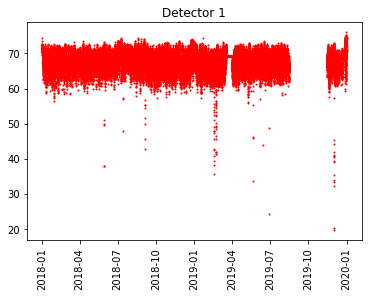

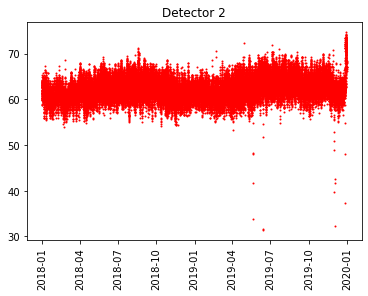

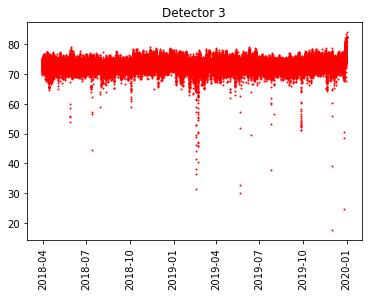

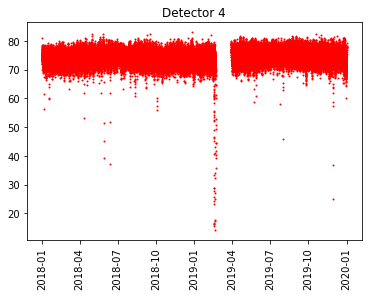

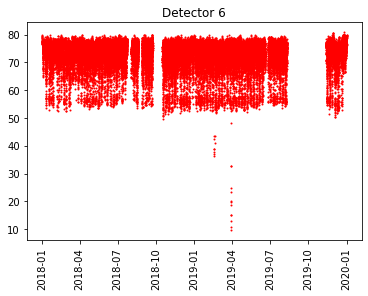

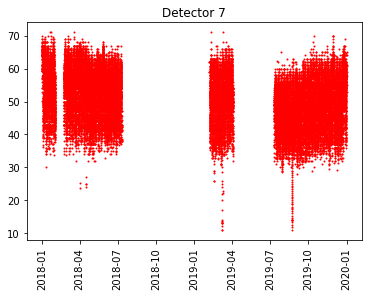

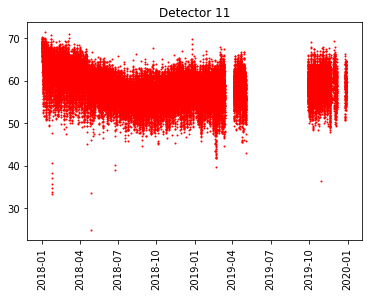

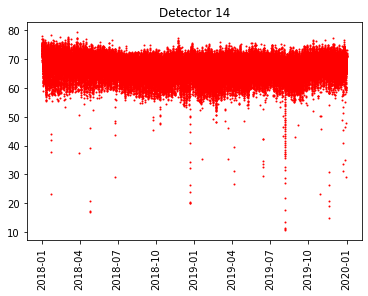

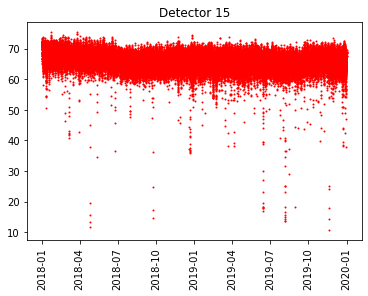

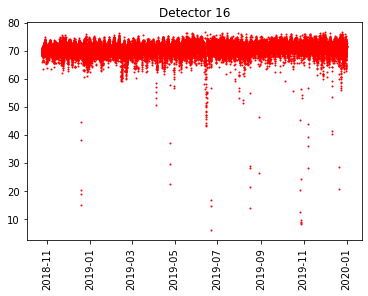

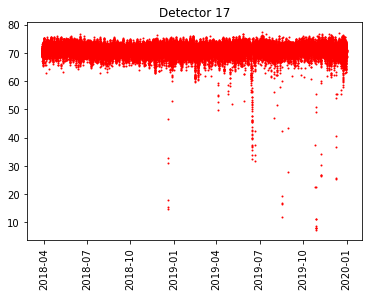

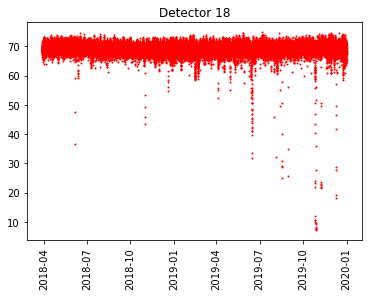

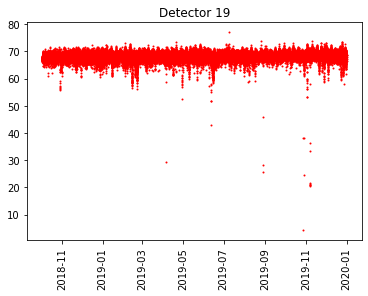

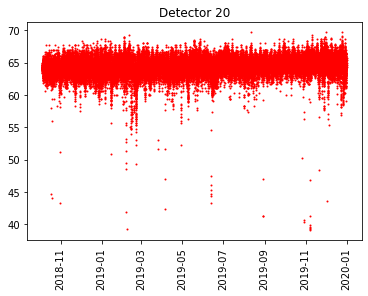

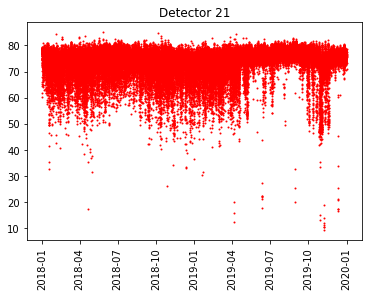

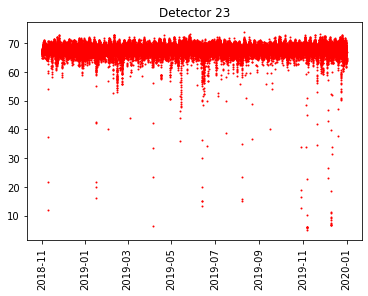

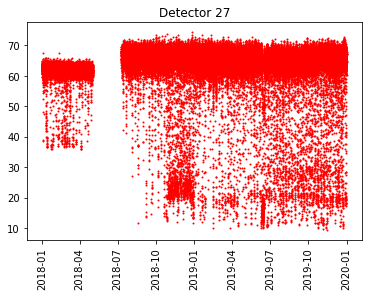

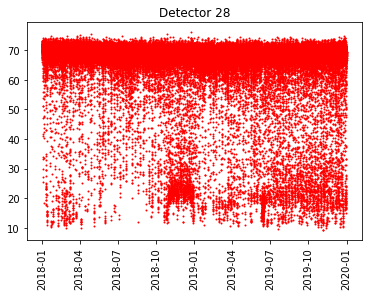

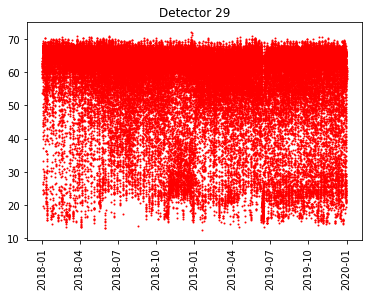

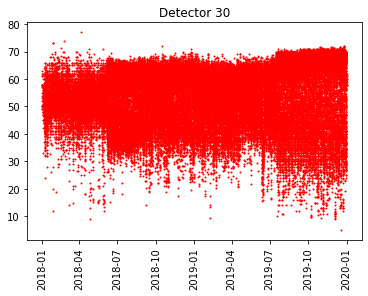

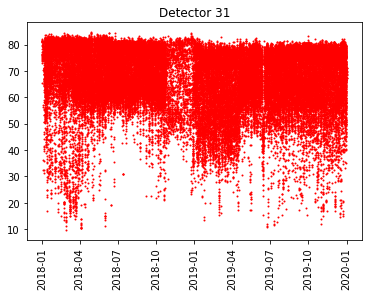

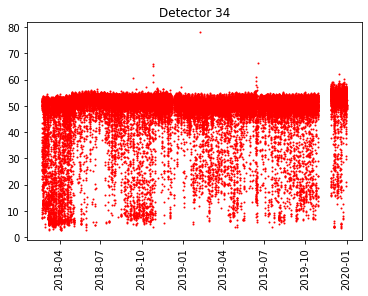

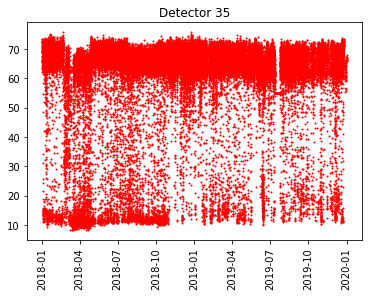

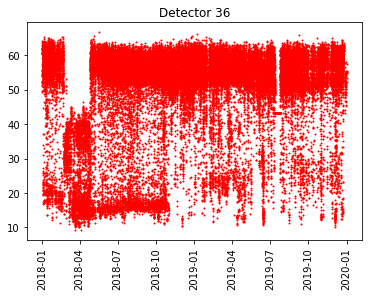

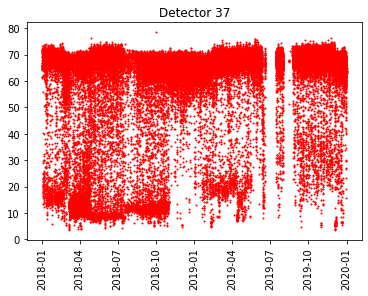

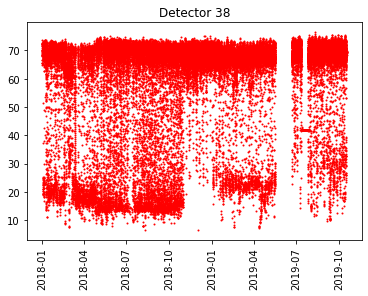

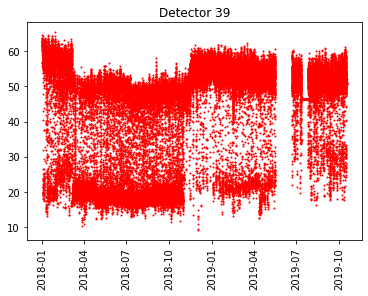

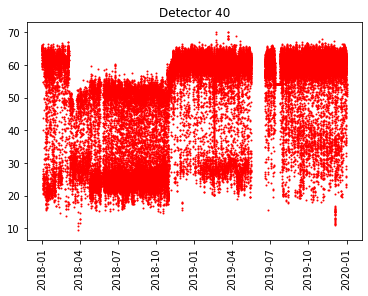

In [6]:
for detector in np.sort(data_evenly['DetectID'].unique()):
#detector = 5
    df = data_evenly[data_evenly['DetectID'] == detector][['DateTimeStamp', 'Speed']]
    #date_mask = df['DateTimeStamp'].map(lambda x: x.year == 2018 and x.month == 1)# and x.day == 20 and x.hour > 17)
    #df = df[date_mask]
    #df.dropna(inplace=True)
    plt.figure()
    plt.title(f'Detector {detector}')
    plt.scatter(df['DateTimeStamp'], df['Speed'],s=1,c='r')
    plt.xticks(rotation='vertical')

In [78]:
date_unq = data_evenly['DateTimeStamp'].unique()
detect_unq = len(data_evenly['DetectID'].unique())
count_100 = 0
count_90 = 0
count_80 = 0
count_70 = 0
count_60 = 0
count_less = 0
print(f'Number of dates = {len(date_unq)}')
for date in date_unq:
    temp_df = data_evenly[data_evenly['DateTimeStamp'] == date]
    num_sensors = temp_df['Speed'].count()

    if num_sensors == int(detect_unq):
        count_100 += 1
    elif num_sensors >= int(detect_unq*0.9):
        count_90 += 1
    elif num_sensors >= int(detect_unq*0.8):
        count_80 += 1
    elif num_sensors >= int(detect_unq*0.7):
        count_70 += 1
    elif num_sensors >= int(detect_unq*0.6):
        count_60 += 1
    else:
        count_less +=1
print(f'Samples 100% of detectors = {count_100}')
print(f'Samples 90% of detectors = {count_90}')
print(f'Samples 80% of detectors = {count_80}')
print(f'Samples 70% of detectors = {count_70}')
print(f'Samples 60% of detectors = {count_60}')
print(f'Samples << = {count_less}')
print(f'Samples Sum = {count_100+count_90+count_80+count_70+count_60+count_less}')

Number of dates = 70080
Samples 100% of detectors = 556
Samples 90% of detectors = 16827
Samples 80% of detectors = 24312
Samples 70% of detectors = 17044
Samples 60% of detectors = 5647
Samples << = 5694
Samples Sum = 70080


[70080. 70080. 70080. 70080. 70080. 70080. 70080.     0.     0.     0.
     0.     0.     0.     0. 70080.]
37376.0


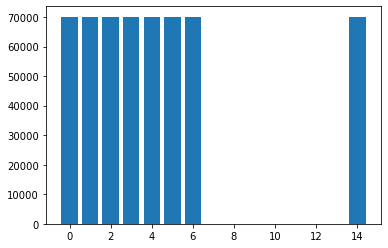

In [80]:
date_unq = pd.Series(data_evenly['DateTimeStamp'].unique())
count = np.zeros(15)
error = 3
for num in range(15):
    for i in range(len(date_unq)):
        diff = abs((date_unq[i].time().minute - num) % 15)
        if diff > 7:
            diff = 15 - diff
        if diff > error:
            count[num] += 1
print(count)
plt.bar(range(15), count)
print(np.mean(count))

In [11]:
data_evenly_arrary = data_evenly.to_numpy()
num_date = len(data_evenly['DateTimeStamp'].unique())
detect_unq = data_evenly['DetectID'].unique()
num_detect = len(detect_unq)

data_evenly_mice = []
for i in range(num_date):
    data_evenly_mice.append(np.concatenate(data_evenly_arrary[i*num_detect: (i+1)*num_detect, 3:6]))

data_evenly_mice = np.array(data_evenly_mice)

columns = []
for detect in detect_unq:
    columns.append(f'Volume_{detect}')
    columns.append(f'Occupancy_{detect}')
    columns.append(f'Speed_{detect}')

data_evenly_mice = pd.DataFrame(data_evenly_mice, columns=columns)
data_evenly_mice.head()

Volume_1 Occupancy_1 Speed_1 Volume_2 Occupancy_2 Speed_2 Volume_3  \
0     22.7       0.333    67.3       18       0.333    62.7      NaN   
1     22.7           0      70     15.3           0    62.7      NaN   
2     25.7           0    69.7      NaN         NaN     NaN      NaN   
3     52.3           1    70.3     40.7       0.667    60.3      NaN   
4       57           1    70.7       44       0.333      61      NaN   

  Occupancy_3 Speed_3 Volume_4  ... Speed_37 Volume_38 Occupancy_38 Speed_38  \
0         NaN     NaN     25.7  ...     61.5      97.7         1.33     65.7   
1         NaN     NaN     16.3  ...     65.2       163         2.33     68.3   
2         NaN     NaN     22.7  ...       66       171         2.83       69   
3         NaN     NaN       26  ...       66       161         2.67     68.3   
4         NaN     NaN     16.3  ...     64.5       164         2.83       68   

  Volume_39 Occupancy_39 Speed_39 Volume_40 Occupancy_40 Speed_40  
0        72            1     59.3        96         1.83     61.5  
1       122         2.17     60.2       155         3.33     61.7  
2       132            2     62.3       NaN          NaN      NaN  
3       119          2.5     60.3       164         4.33       63  
4       125            2     60.7       161         3.33     62.3  

[5 rows x 84 columns]

In [13]:
#kds = mf.KernelDataSet(
#  data_evenly_mice,
#  save_all_iterations=True,
#  random_state=1991
#)

kds = mf.MultipleImputedKernel(
  data_evenly_mice,
  datasets=3,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations
kds.mice(3)

# Return the completed kernel data
completed_data = kds.complete_data()

completed_data.head()

<class 'miceforest.KernelDataSet.KernelDataSet'>


In [16]:
# Return the completed kernel data
completed_data = kds.complete_data(0)
print(completed_data.head())
completed_data = kds.complete_data(1)
print(completed_data.head())
completed_data = kds.complete_data(2)
print(completed_data.head())

  Volume_1 Occupancy_1 Speed_1 Volume_2 Occupancy_2 Speed_2 Volume_3  \
0     22.7       0.333    67.3       18       0.333    62.7       27   
1     22.7           0      70     15.3           0    62.7     23.9   
2     25.7           0    69.7     18.7       0.333    60.7       27   
3     52.3           1    70.3     40.7       0.667    60.3     59.7   
4       57           1    70.7       44       0.333      61     52.5   

  Occupancy_3 Speed_3 Volume_4  ... Speed_37 Volume_38 Occupancy_38 Speed_38  \
0       0.191      73     25.7  ...     61.5      97.7         1.33     65.7   
1           0    73.7     16.3  ...     65.2       163         2.33     68.3   
2           0    73.8     22.7  ...       66       171         2.83       69   
3       0.667      76       26  ...       66       161         2.67     68.3   
4       0.667    74.7     16.3  ...     64.5       164         2.83       68   

  Volume_39 Occupancy_39 Speed_39 Volume_40 Occupancy_40 Speed_40  
0        72       

In [15]:
import pickle
impute_model = b[2]
print(type(impute_model))
with open('datasets/las_vegas/i15_bugatti/imputer_mice_model.pickle', 'wb') as handle:
    pickle.dump(impute_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

<class 'miceforest.KernelDataSet.KernelDataSet'>


In [17]:
completed_data.to_csv('datasets/las_vegas/i15_bugatti/completed_data3.csv', index=False)

In [9]:
import pickle
with open('datasets/las_vegas/i15_bugatti/multi_imputer_mice_model.pickle', 'wb') as handle:
    pickle.dump(kds, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
#import pickle
#with open('datasets/las_vegas/i15_bugatti/imputer_mice_model.pickle', 'rb') as handle:
#    b = pickle.load(handle)
# --> Memory error
#print(kds == b)

In [16]:
data_mice_test = data_evenly_mice[40000:45000]
imputed_data = impute_model.impute_new_data(new_data=data_mice_test)
imputed_data = imputed_data.complete_data()
imputed_data.head()

Volume_1 Occupancy_1 Speed_1 Volume_2 Occupancy_2 Speed_2 Volume_3  \
40000     68.5        1.33    68.3     61.5           1    60.3     80.9   
40001     71.7        1.85      67     68.1           1    60.1     90.3   
40002     77.2        1.71    64.7     53.9       0.748    64.5     83.8   
40003       70        1.92    63.2     26.6       0.199    70.5     78.6   
40004     63.8         1.5    63.5     47.1       0.533    69.2     73.9   

      Occupancy_3 Speed_3 Volume_4  ... Speed_37 Volume_38 Occupancy_38  \
40000        1.92    72.8     46.3  ...       57       281         6.54   
40001        2.24    69.6     46.3  ...     53.5       306         11.8   
40002        1.81    66.9     50.9  ...     56.1       304         12.6   
40003        2.19      67       85  ...       57       297         8.97   
40004        1.82    69.4      156  ...     57.2       320          7.8   

      Speed_38 Volume_39 Occupancy_39 Speed_39 Volume_40 Occupancy_40 Speed_40  
40000     57.8       231         6.41     43.5       304           11     42.2  
40001     43.7       237         12.2     30.7       330         17.6     32.2  
40002     39.4       246         15.6     24.9       347         22.2     27.9  
40003       49       245         13.8     26.4       323         19.7     30.4  
40004     55.4       258         10.8     31.1       350         19.1     32.4  

[5 rows x 84 columns]

In [17]:
imputed_data.shape

(5000, 84)

In [39]:
#data_evenly = pd.read_csv('datasets/las_vegas/i15_bugatti/bugatti_nb_data_evenly.csv')
completed_data = pd.read_csv('datasets/las_vegas/i15_bugatti/completed_data.csv')
data_evenly_full = []
completed_data_array = completed_data.to_numpy()
num_date = len(data_evenly['DateTimeStamp'].unique())
detect_unq = data_evenly['DetectID'].unique()
num_detect = len(detect_unq)

for i in range(num_date):
    for j in range(num_detect):
        data_evenly_full.append(completed_data_array[i, j*3:j*3+3])

print(np.array(data_evenly_full).shape)

(1962240, 3)


In [47]:
print(np.array(data_evenly_full).shape)
#print(data_evenly[['DateTimeStamp', 'DetectID']])
#print(pd.DataFrame(data_evenly_full, columns=['Volume', 'Occupancy', 'Speed']))
data_evenly_complete = pd.concat([data_evenly[['DateTimeStamp', 'DetectID']], pd.DataFrame(data_evenly_full, columns=['Volume', 'Occupancy', 'Speed'])], axis=1)
data_evenly_complete['Volume'] = data_evenly_complete['Volume']*4
data_evenly_complete.rename(columns={"Volume": "Flow"}, inplace=True)
data_evenly_complete.head()


(1962240, 3)


DateTimeStamp  DetectID     Flow  Occupancy   Speed
0 2018-01-01 00:10:00         1   90.667      0.333  67.333
1 2018-01-01 00:10:00         2   72.000      0.333  62.667
2 2018-01-01 00:10:00         3   97.700      0.000  72.000
3 2018-01-01 00:10:00         4  102.667      0.000  81.000
4 2018-01-01 00:10:00         6   88.000      0.000  79.333

In [48]:
data_evenly_complete.to_csv('datasets/las_vegas/i15_bugatti/data_evenly_complete.csv', index=False)

In [ ]:
data_evenly_complete

## No Aplica (codigo viejo)

[58842.93333333 50436.8        42030.66666667 33624.53333333
 25218.4        16812.26666667  8406.13333333     0.
     0.             0.             0.             0.
     0.             0.             0.        ]


<BarContainer object of 15 artists>

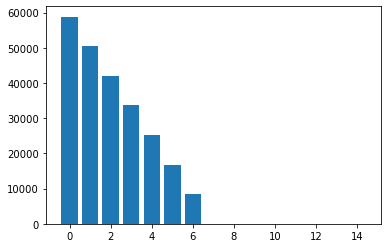

In [42]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
count_master = np.zeros(15)
for e in range(15):
    count = np.zeros(15)
    error = e
    for num in range(15):
        for i in range(len(date_unq)):
            diff = abs((date_unq[i].time().minute - num) % 15)
            if diff > 7:
                diff = 15 - diff
            if diff > error:
                count[num] += 1
    count_master[e] = np.mean(count)
print(count_master)
plt.bar(range(15), count_master)

In [70]:
import traces
import datetime

dti = pd.date_range("2018-01-01 00:10:00", periods=10, freq="15min")
print(dti)
data_detect = data_nan[data_nan['DetectID'] == 40].reset_index(drop=True)
data_detect_evenly = pd.DataFrame(columns=data_detect.columns)
print(data_detect_evenly)
data_detect_evenly = data_detect_evenly.append(data_detect.iloc[0])
print(data_detect_evenly)
data_detect_evenly = data_detect_evenly.append(data_detect.iloc[1])
print(data_detect_evenly)


data_detect_pre = data_detect.iloc[:10, [0,3+1]].dropna().reset_index(drop=True)
print(data_detect_pre.head(10))


data_detect_pre.to_csv('auxiliary.csv', index=False)
def parse_iso_datetime(value):
    return datetime.datetime.strptime(value, "%Y-%m-%d %H:%M:%S")

def time_from_csv(filename):
    time_series = traces.TimeSeries.from_csv(
                filename,
                time_column=0,
                time_transform=parse_iso_datetime,
                value_column=1,
                value_transform=float,
                default=0,
            )
    time_series.compact()
    return time_series
ts = time_from_csv('auxiliary.csv')
print(time_from_csv('auxiliary.csv'))
regular = ts.moving_average(900, start=datetime.datetime(2018, 1, 1,  0,  10,  0), end=data_detect_pre.iloc[-1, 0], pandas=True)
print(regular)
#print(regular[datetime.datetime(2018, 1, 1,  2,  40,  0)])


print(data_detect.loc[0, 'DateTimeStamp'], dti[0] - pd.Timedelta('3min'), dti[0] + pd.Timedelta('3min'))
print(data_detect.loc[0, 'DateTimeStamp'] >= dti[0] - pd.Timedelta('3min')) and (data_detect.loc[0, 'DateTimeStamp'] <= dti[0] + pd.Timedelta('3min'))

DatetimeIndex(['2018-01-01 00:10:00', '2018-01-01 00:25:00',
               '2018-01-01 00:40:00', '2018-01-01 00:55:00',
               '2018-01-01 01:10:00', '2018-01-01 01:25:00',
               '2018-01-01 01:40:00', '2018-01-01 01:55:00',
               '2018-01-01 02:10:00', '2018-01-01 02:25:00'],
              dtype='datetime64[ns]', freq='15T')
Empty DataFrame
Columns: [DateTimeStamp, DetectID, Lane, Volume, Occupancy, Speed, Poll_Count, Failure, Invalid]
Index: []
        DateTimeStamp DetectID  Lane  Volume  Occupancy  Speed  Poll_Count  \
0 2018-01-01 00:12:14       40   3.5    96.0      1.833   61.5        15.0   

   Failure  Invalid  
0      0.0      0.0  
        DateTimeStamp DetectID  Lane   Volume  Occupancy   Speed  Poll_Count  \
0 2018-01-01 00:12:14       40   3.5   96.000      1.833  61.500        15.0   
1 2018-01-01 00:27:23       40   3.5  154.667      3.333  61.667        16.0   

   Failure  Invalid  
0      0.0      0.0  
1      0.0      0.0  
        DateT

In [119]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
detect_unq = pd.Series(np.sort(data['DetectID'].unique()))
date_chunck = data[data['DateTimeStamp'] == date_unq.iloc[0]]
print(date_chunck.loc[1, 'DetectID'])
print(detect_unq.iloc[1])
print(date_chunck)

2
2
         DateTimeStamp  DetectID  Lane   Volume  Occupancy   Speed  \
0  2018-01-01 00:12:14         1   2.0   22.667      0.333  67.333   
1  2018-01-01 00:12:14         2   2.0   18.000      0.333  62.667   
2  2018-01-01 00:12:14         4   2.0   25.667      0.000  81.000   
4  2018-01-01 00:12:14         6   2.0   22.000      0.000  79.333   
5  2018-01-01 00:12:14         7   3.0   12.000      0.000  61.000   
9  2018-01-01 00:12:14        11   2.0   31.333      0.000  64.667   
12 2018-01-01 00:12:14        14   2.0   36.000      0.000  74.000   
13 2018-01-01 00:12:14        15   2.0   50.000      0.667  71.333   
19 2018-01-01 00:12:14        21   2.0   38.667      0.000  76.667   
25 2018-01-01 00:12:14        27   2.0   70.000     50.000  59.500   
26 2018-01-01 00:12:14        28   2.0   94.333      3.333  66.000   
27 2018-01-01 00:12:14        29   2.0   95.333      2.000  58.667   
28 2018-01-01 00:12:14        31   2.0  156.667      4.333  65.333   
31 2018-01-01 00

In [ ]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
count_detect = np.zeros(len(data['DetectID'].unique()))
for i in range(len(date_unq)):
    num_sensors = data[data['DateTimeStamp'] == date_unq[i]].shape[0]
    count_detect[num_sensors-1] += 1
print(count_detect)

In [ ]:
limit = 16
print(sum(count_detect[limit-1:]))
print(sum(count_detect[:limit-1]))

## Data of the I15 SB

### Carga de la data.
La base de datos SQL posee datos del 01-01-2018 al 31-12-2019 de todos los sensores (a excepción de algunos parecen no estar funcionando) que aparecen en la plataforma Bugatti FAST. De esta base de datos se exportó un dataset con los datos de los sensores pertenecientes a la I15_SB (I15 dirección sur). El dataset "lean" es el mismo dataset exportado eliminando las columnas de datos que no utilizo (Vease los drops que se encuentran comentados). Existen dos valores denominados "Invalid" -> [0, 1, 2, 3] y "Failure" -> [0 - 448] que aún no sé como utilizar porque no sé qué significan sus valores.

### Data loading
The SQL database has data from 01-01-2018 to 31-12-2019 of all the sensors that appear in the Bugatti FAST dashboard (except for some that seem not to be working). From this database a dataset was exported with data from sensors belonging to the I15_NB (I15 northbound). The "lean" dataset is the same dataset exported, but eliminating the columns of data that I do not use (see commented "drops"). There are two values named "Invalid" -> [0, 1, 2, 3] and "Failure" -> [0 - 448] that I still don't know how to use because I don't know what their values mean.

In [ ]:
data_file_name = "datasets/las_vegas/i15_bugatti/bugatti_sb_data_lean.csv"
# data_file_name = "datasets/las_vegas/i15_bugatti/bugatti_sb_data.csv"

data = pd.read_csv(data_file_name)
# data = data.drop(columns=['Path', 'RoadIndex', 'RoadwayID', 'SegmentID', 'DeviceID',
#                           'Volume1', 'Volume2', 'Volume3', 'Volume4', 'Volume5', 'Volume6',
#                           'RoadType', 'Location', 'Polling_Period', 'DayOfWeek',
#                           'DateValue', 'HourIdx', 'Holiday'])
# data.to_csv('bugatti_sb_data_lean.csv', index=False)

data.head(10)

In [ ]:
data.describe()

In [ ]:
#print(data['Path'].unique())

### Invalid Evaluation

Invalid = 1

In [ ]:
data_bad = data[data['Invalid'] == 1]
print(data_bad['Invalid'].count())
data_bad.head(10)

Invalid = 2

In [ ]:
data_bad = data[data['Invalid'] == 2]
print(data_bad['Invalid'].count())
data_bad.head(10)

Invalid = 3

In [ ]:
data_bad = data[data['Invalid'] == 3]
print(data_bad['Invalid'].count())
data_bad.head(10)

In [ ]:
print(f"Number of Valid Values: {len(data['Invalid'][data['Invalid'] == 0])} ({(len(data['Invalid'][data['Invalid'] == 0])/len(data))*100}%)")
print(f"Number of Invalid Values: {len(data['Invalid'][data['Invalid'] != 0])} ({(len(data['Invalid'][data['Invalid'] != 0])/len(data))*100}%)")
print(f"Number of Invalid = 1: {len(data['Invalid'][data['Invalid'] == 1])} ({(len(data['Invalid'][data['Invalid'] == 1])/len(data))*100}%)")
print(f"Number of Invalid = 2: {len(data['Invalid'][data['Invalid'] == 2])} ({(len(data['Invalid'][data['Invalid'] == 2])/len(data))*100}%)")
print(f"Number of Invalid = 3: {len(data['Invalid'][data['Invalid'] == 3])} ({(len(data['Invalid'][data['Invalid'] == 3])/len(data))*100}%)")

print(f"Number Unique of Invalid Values: {len(data['Invalid'].unique())}")
hist = data['Invalid'].hist(bins=len(data['Invalid'].unique()))

Zoom on the Invalid values

In [ ]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [ ]:
#data['Invalid'][(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0)] = 4
data_invalid2_special = data.loc[(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0), 'Invalid']
data.loc[(data['Invalid'] == 2) & (data['Volume'] == 0) & (data['Occupancy'] == 0), 'Invalid'] = 0
print(f"Number of Invalid = 2 (Special case): {len(data_invalid2_special)} ({(len(data_invalid2_special)/len(data))*100}%)")

In [ ]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [ ]:
print(f"Number of Correct Values: {len(data['Failure'][data['Failure'] == 0])} ({(len(data['Failure'][data['Failure'] == 0])/len(data))*100}%)")
print(f"Number of Failure Values: {len(data['Failure'][data['Failure'] != 0])} ({(len(data['Failure'][data['Failure'] != 0])/len(data))*100}%)")

print(f"Number Unique of Failure Values: {len(data['Failure'].unique())}")

In [ ]:
print(f"Number of Failure Values: {len(data['Failure'][data['Failure'] != 0])}")
print(f"Number Unique of Failure Values: {len(data['Failure'].unique())}")

In [ ]:
detectors_sb_list = ['395.2.106',
  '394.3.104',
  '390.1.252',
  '390.2.250',
  '390.3.249',
  '389.1.248',
  '389.2.247',
  '388.1.245',
  '388.2.244',
  '388.3.243',
  '161.1.242',
  '161.2.241',
  '155.1.240',
  '155.2.239',
  '156.2.57',
  '147.2.56',
  '142.1.55',
  '142.2.54',
  '132.1.80',
  '136.1.47',
  '136.2.47',
  '123.2.50',
  '117.1.46',
  '117.2.46',
  '117.3.43',
  '111.1.42',
  '102.1.40',
  '102.2.606',
  '102.3.37',
  '98.2.34',
  '98.3.32',
  '91.1.31',
  '91.2.29',
  '92.2.27',
  '76.2.26',
  '77.2.24',
  '78.1.20',
  '78.2.20',
  '64.1.19',
  '69.1.52',
  '69.2.16',
  '56.1.14',
  '57.1.13',
  '57.2.11',
  '57.3.10',
  '40.1.9',
  '41.1.95',
  '41.2.140',
  '17.2.141',
  '348.1.149',
  '348.2.151',
  '348.3.150',
  '349.1.154',
  '349.3.152',
  '350.1.158',
  '350.2.159',
  '350.3.314',
  '351.1.315',
  '351.2.316',
  '351.3.317',
  '352.1.318',
  '352.2.321',
  '352.3.322',
  '353.1.323',
  '353.2.324',
  '422.1.326',
  '422.2.328',
  '423.1.329',
  '423.2.330',
  '423.3.331',
  '424.1.332',
  '424.2.333',
  '424.3.334',
  '425.1.335']
print(len(detectors_sb_list))
detector_id_map = {}
data_unique_detect_ID = data['DetectorID'].unique()

count_loss = 0
for i in range(len(detectors_sb_list)):
    if detectors_sb_list[i] in data_unique_detect_ID:
        detector_id_map[detectors_sb_list[i]] = i - count_loss
    else:
        count_loss += 1
print(f'Detectors lost = {count_loss}')

data_detect_ID = data['DetectorID']

data_detect_new_ID = pd.Series([detector_id_map[i] for i in data_detect_ID])
print(data_detect_new_ID)
data['DetectID'] = data_detect_new_ID

In [ ]:
data['DateTimeStamp'] = pd.to_datetime(data['DateTimeStamp'])
data = data.sort_values(by=['DateTimeStamp','DetectID'],ascending=[True, True])

date_time_obj = data['DateTimeStamp'].iloc[0]
print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Minute:', date_time_obj.time().minute)
print('Date-time:', date_time_obj)

print(data['DateTimeStamp'].unique())
print(len(data['DateTimeStamp'].unique()))

In [ ]:
date_unq = pd.Series(data['DateTimeStamp'].unique())
date_rest = []
date_rare = []
date_no_15 = []
for i in range(len(date_unq)-1):
    if date_unq[i+1].time().hour == date_unq[i].time().hour:
        rest = date_unq[i+1].time().minute - date_unq[i].time().minute
    elif (date_unq[i+1].time().hour > date_unq[i].time().hour) or ((date_unq[i+1].time().hour == 0) and (date_unq[i].time().hour == 23)):
        rest = date_unq[i+1].time().minute + 60 - date_unq[i].time().minute
    else:
        rest = -1
        date_rare.append([date_unq[i+1], date_unq[i]])
        #print("algo raro")
    date_rest.append(rest)
    if rest != 15:
        date_no_15.append([rest, date_unq[i+1], date_unq[i]])

print(f'\nTotal DateTimes = {len(date_unq)} vs Total DateTimes in 2 years with a period of 15 min = {(60/15)*24*365*2} --> DateLoss = {100 - (100*(len(date_unq)/((60/15)*24*365*2)))}')
print(f'Periods other than 15 min = {len(date_no_15)}\n')

# Datos Raros
print(f'Very high periods (2h a 2 días) = {len(date_rare)}')
print(date_rare)

num = list(np.unique(date_rest))
count = np.zeros(len(num))
for i in date_no_15:
    if i[0] in num:
        count[num.index(i[0])] += 1
count[num.index(15)] = len(date_unq) - len(date_no_15)

fusion = []
for i in range(len(num)):
    fusion.append([num[i], count[i]])
print('\nPeriods vs number of samples')
print(fusion)

In [ ]:
data = data.groupby(['DateTimeStamp','DetectID'], as_index=False).mean()

In [ ]:
data.head(10)

In [ ]:
data.describe()

In [ ]:
data.describe(include=['datetime64[ns]', 'object'])

In [ ]:
print(data.info())
print(f'Shape of the data = {data.shape}')
#print(data.columns)

In [ ]:
print('NA Count:')
print(data.isna().sum())

In [ ]:
print(f"Number of Valid Values: {len(data['Invalid'][data['Invalid'] == 0])} ({(len(data['Invalid'][data['Invalid'] == 0])/len(data))*100}%)")
print(f"Number of Invalid Values: {len(data['Invalid'][data['Invalid'] != 0])} ({(len(data['Invalid'][data['Invalid'] != 0])/len(data))*100}%)")
print(f"Number of Invalid = 1: {len(data['Invalid'][data['Invalid'] == 1])} ({(len(data['Invalid'][data['Invalid'] == 1])/len(data))*100}%)")
print(f"Number of Invalid = 2: {len(data['Invalid'][data['Invalid'] == 2])} ({(len(data['Invalid'][data['Invalid'] == 2])/len(data))*100}%)")
print(f"Number of Invalid = 3: {len(data['Invalid'][data['Invalid'] == 3])} ({(len(data['Invalid'][data['Invalid'] == 3])/len(data))*100}%)")

print(f"Number Unique of Invalid Values: {len(data['Invalid'].unique())}")
hist = data['Invalid'].hist(bins=len(data['Invalid'].unique()))

In [ ]:
hist = data['Invalid'][data['Invalid'] != 0].hist(bins=len(data['Invalid'].unique()) - 1)

In [ ]:
print(f"Number of Correct Values: {len(data['Failure'][data['Failure'] == 0])} ({(len(data['Failure'][data['Failure'] == 0])/len(data))*100}%)")
print(f"Number of Failure Values: {len(data['Failure'][data['Failure'] != 0])} ({(len(data['Failure'][data['Failure'] != 0])/len(data))*100}%)")

print(f"Number Unique of Failure Values: {len(data['Failure'].unique())}")

In [ ]:
hist = data['DetectID'].hist(bins=len(data['DetectID'].unique()))

In [ ]:
print('Samples by detector "Totals"')
data.groupby('DetectID')['DateTimeStamp'].count()

In [ ]:
print('Samples by detector "Percentage"')
data.groupby('DetectID')['DateTimeStamp'].count()*100/63092
